***
# Supervised Learning : Comparing Batch, Stochastic and Mini-Batch Approaches to Gradient Descent in Estimating Regression Coefficients

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *March 9, 2024*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Cleaning](#1.4.1)
        * [1.4.2 Missing Data Imputation](#1.4.2)
        * [1.4.3 Outlier Treatment](#1.4.3)
        * [1.4.4 Collinearity](#1.4.4)
        * [1.4.5 Shape Transformation](#1.4.5)
        * [1.4.6 Centering and Scaling](#1.4.6)
        * [1.4.7 Data Encoding](#1.4.7)
        * [1.4.8 Preprocessed Data Description](#1.4.8)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Linear Regression Model Coefficient Estimation](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 Normal Equations](#1.6.2)
        * [1.6.3 Batch Gradient Descent Algorithm with Low Learning Rate](#1.6.3)
        * [1.6.4 Batch Gradient Descent Algorithm with High Learning Rate](#1.6.4)
        * [1.6.5 Stochastic Gradient Descent Algorithm with Low Learning Rate](#1.6.5)
        * [1.6.6 Stochastic Gradient Descent Algorithm with High Learning Rate](#1.6.6)
        * [1.6.7 Mini-Batch Gradient Descent Algorithm with Low Learning Rate](#1.6.7)
        * [1.6.8 Mini-Batch Gradient Descent Algorithm with High Learning Rate](#1.6.8)
    * [1.7 Consolidated Findings](#1.7)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project manually implements the **Batch Gradient Descent**, **Stochastic Gradient Descent** and **Mini-Batch Gradient Descent** algorithms using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>, and evaluates a range of values for the learning rate to optimally estimate the coefficients of a linear regression model. The gradient descent path and cost function optimization profiles of the different candidate parameter settings were compared, with the resulting estimated coefficients assessed against those obtained using normal equations which served as the reference baseline values. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.

[Linear Regression](https://link.springer.com/book/10.1007/978-1-4757-3462-1) explores the linear relationship between a scalar response and one or more covariates by having the conditional mean of the dependent variable be an affine function of the independent variables. The relationship is modeled through a disturbance term which represents an unobserved random variable that adds noise. The algorithm is typically formulated from the data using the least squares method which seeks to estimate the coefficients by minimizing the squared residual function. The linear equation assigns one scale factor represented by a coefficient to each covariate and an additional coefficient called the intercept or the bias coefficient which gives the line an additional degree of freedom allowing to move up and down a two-dimensional plot.

[Regression Coefficients](https://link.springer.com/book/10.1007/978-1-4757-3462-1) represent the changes in the independent variable which explain the variation of the dependent variable in the model. The methods applied in this study attempt to estimate the unknown model coefficients by optimizing a loss function - that which measures the quality of the estimated parameters based on how well the model-induced scores agree with the ground truth labels in the data set.

[Normal Equations](https://www.semanticscholar.org/paper/Nouvelles-m%C3%A9thodes-pour-la-d%C3%A9termination-des-des-Legendre/21c9090e226ab449ffb608ddb2cb925911a61f24) are a system of equations whose solution is the Ordinary Least Squares (OLS) estimator of the regression coefficients and which are derived from the first-order condition of the least squares minimization problem. These equations are obtained by setting equal to zero the partial derivatives of the sum of squared errors (least squares). This approach is a closed-form solution and a one-step algorithm used to analytically find the coefficients that minimize the loss function.

[Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) minimizes the loss function parameterized by the model’s coefficients based on the direction and learning rate factors which determine the partial derivative calculations of future iterations, allowing the algorithm to gradually arrive at the local or global minimum considered the point of convergence. 

[Batch Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) uses the entire training dataset to compute the gradients of the loss function with respect to the model parameters. The gradients are computed for all training examples simultaneously, and then the model parameters are updated accordingly. This approach provides the most accurate estimate of the gradient, as it considers all data points. However, it can be computationally expensive, especially for large datasets, because it requires processing the entire dataset in each iteration. Despite its computational cost, full batch gradient descent is guaranteed to converge to the global minimum of the loss function, assuming the learning rate is appropriately chosen and the loss function is convex.

[Stochastic Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) uses only one randomly selected training example at each iteration to compute the gradient of the loss function. The model parameters are updated based on the gradient computed from this single example. Since this approach updates the parameters more frequently with noisy estimates of the gradient, it tends to have more frequent but noisy updates, leading to faster convergence in terms of wall-clock time compared to full batch gradient descent. However, the stochastic nature of the updates can cause oscillations in the training process, and the updates may not accurately represent the true direction of the gradient.

[Mini-Batch Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) serves as a compromise between full batch gradient descent and stochastic gradient descent. Instead of processing the entire dataset or just one example at a time, mini-batch gradient descent divides the dataset into small batches of fixed size. The gradients are computed for each mini-batch, and the model parameters are updated based on the average gradient computed from the mini-batch. This approach combines the advantages of both full batch and stochastic gradient descent. It provides more stable updates compared to stochastic gradient descent while being computationally more efficient than full batch gradient descent. The batch size can be adjusted based on computational resources and desired convergence properties.


## 1.1. Data Background <a class="anchor" id="1.1"></a>

Datasets used for the analysis were separately gathered and consolidated from various sources including: 
1. Cancer Rates from [World Population Review](https://worldpopulationreview.com/country-rankings/cancer-rates-by-country)
2. Social Protection and Labor Indicator from [World Bank](https://data.worldbank.org/topic/social-protection-and-labor?view=chart)
3. Education Indicator from [World Bank](https://data.worldbank.org/topic/education?view=chart)
4. Economy and Growth Indicator from [World Bank](https://data.worldbank.org/topic/economy-and-growth?view=chart)
5. Environment Indicator from [World Bank](https://data.worldbank.org/topic/environment?view=chart)
6. Climate Change Indicator from [World Bank](https://data.worldbank.org/topic/climate-change?view=chart)
7. Agricultural and Rural Development Indicator from [World Bank](https://data.worldbank.org/topic/agriculture-and-rural-development?view=chart)
8. Social Development Indicator from [World Bank](https://data.worldbank.org/topic/social-development?view=chart)
9. Health Indicator from [World Bank](https://data.worldbank.org/topic/health?view=chart)
10. Science and Technology Indicator from [World Bank](https://data.worldbank.org/topic/science-and-technology?view=chart)
11. Urban Development Indicator from [World Bank](https://data.worldbank.org/topic/urban-development?view=chart)
12. Human Development Indices from [Human Development Reports](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI)
13. Environmental Performance Indices from [Yale Center for Environmental Law and Policy](https://epi.yale.edu/epi-results/2022/component/epi)

This study hypothesized that various global development indicators and indices influence cancer rates across countries.

The target variable for the study is:
* <span style="color: #FF0000">CANRAT</span> - Age-standardized cancer rates, per 100K population (2022)

The predictor variables for the study are:
* <span style="color: #FF0000">GDPPER</span> - GDP per person employed, current US Dollars (2020)
* <span style="color: #FF0000">URBPOP</span> - Urban population, % of total population (2020)
* <span style="color: #FF0000">PATRES</span> - Patent applications by residents, total count (2020)
* <span style="color: #FF0000">RNDGDP</span> - Research and development expenditure, % of GDP (2020)
* <span style="color: #FF0000">POPGRO</span> - Population growth, annual % (2020)
* <span style="color: #FF0000">LIFEXP</span> - Life expectancy at birth, total in years (2020)
* <span style="color: #FF0000">TUBINC</span> - Incidence of tuberculosis, per 100K population (2020)
* <span style="color: #FF0000">DTHCMD</span> - Cause of death by communicable diseases and maternal, prenatal and nutrition conditions,  % of total (2019)
* <span style="color: #FF0000">AGRLND</span> - Agricultural land,  % of land area (2020)
* <span style="color: #FF0000">GHGEMI</span> - Total greenhouse gas emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">RELOUT</span> - Renewable electricity output, % of total electricity output (2015)
* <span style="color: #FF0000">METEMI</span> - Methane emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">FORARE</span> - Forest area, % of land area (2020)
* <span style="color: #FF0000">CO2EMI</span> - CO2 emissions, metric tons per capita (2020)
* <span style="color: #FF0000">PM2EXP</span> - PM2.5 air pollution, population exposed to levels exceeding WHO guideline value,  % of total (2017)
* <span style="color: #FF0000">POPDEN</span> - Population density, people per sq. km of land area (2020)
* <span style="color: #FF0000">GDPCAP</span> - GDP per capita, current US Dollars (2020)
* <span style="color: #FF0000">ENRTER</span> - Tertiary school enrollment, % gross (2020)
* <span style="color: #FF0000">HDICAT</span> - Human development index, ordered category (2020)
* <span style="color: #FF0000">EPISCO</span> - Environment performance index , score (2022)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **177 rows** (observations)
    * **22 columns** (variables)
        * **1/22 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/22 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **19/22 predictor** (numeric)
             * <span style="color: #FF0000">GDPPER</span>
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">PATRES</span>
             * <span style="color: #FF0000">RNDGDP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">RELOUT</span>
             * <span style="color: #FF0000">METEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">ENRTER</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/22 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
%matplotlib inline

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy import stats

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline

In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"

In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
cancer_rate = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "NumericCancerRates.csv"))

In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate.shape)

Dataset Dimensions: 


(177, 22)

In [5]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate.dtypes)

Column Names and Data Types:


COUNTRY     object
CANRAT     float64
GDPPER     float64
URBPOP     float64
PATRES     float64
RNDGDP     float64
POPGRO     float64
LIFEXP     float64
TUBINC     float64
DTHCMD     float64
AGRLND     float64
GHGEMI     float64
RELOUT     float64
METEMI     float64
FORARE     float64
CO2EMI     float64
PM2EXP     float64
POPDEN     float64
ENRTER     float64
GDPCAP     float64
HDICAT      object
EPISCO     float64
dtype: object

In [6]:
##################################
# Taking a snapshot of the dataset
##################################
cancer_rate.head()

,COUNTRY,CANRAT,GDPPER,URBPOP,PATRES,RNDGDP,POPGRO,LIFEXP,TUBINC,DTHCMD,...,RELOUT,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,ENRTER,GDPCAP,HDICAT,EPISCO
0,Australia,452.4,98380.63601,86.241,2368.0,NaN,1.235701,83.200000,7.2,4.941054,...,13.637841,131484.763200,17.421315,14.772658,24.893584,3.335312,110.139221,51722.06900,VH,60.1
1,New Zealand,422.9,77541.76438,86.699,348.0,NaN,2.204789,82.256098,7.2,4.354730,...,80.081439,32241.937000,37.570126,6.160799,NaN,19.331586,75.734833,41760.59478,VH,56.7
2,Ireland,372.8,198405.87500,63.653,75.0,1.23244,1.029111,82.556098,5.3,5.684596,...,27.965408,15252.824630,11.351720,6.768228,0.274092,72.367281,74.680313,85420.19086,VH,57.4
3,United States,362.2,130941.63690,82.664,269586.0,3.42287,0.964348,76.980488,2.3,5.302060,...,13.228593,748241.402900,33.866926,13.032828,3.343170,36.240985,87.567657,63528.63430,VH,51.1
4,Denmark,351.1,113300.60110,88.116,1261.0,2.96873,0.291641,81.602439,4.1,6.826140,...,65.505925,7778.773921,15.711000,4.691237,56.914456,145.785100,82.664330,60915.42440,VH,77.9


In [7]:
##################################
# Setting the levels of the categorical variables
##################################
cancer_rate['HDICAT'] = cancer_rate['HDICAT'].astype('category')
cancer_rate['HDICAT'] = cancer_rate['HDICAT'].cat.set_categories(['L', 'M', 'H', 'VH'], ordered=True)

In [8]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(cancer_rate.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
CANRAT,177.0,183.829379,7.974340e+01,78.400000,118.100000,155.300000,240.400000,4.524000e+02
GDPPER,165.0,45284.424283,3.941794e+04,1718.804896,13545.254510,34024.900890,66778.416050,2.346469e+05
URBPOP,174.0,59.788121,2.280640e+01,13.345000,42.432750,61.701500,79.186500,1.000000e+02
PATRES,108.0,20607.388889,1.340683e+05,1.000000,35.250000,244.500000,1297.750000,1.344817e+06
RNDGDP,74.0,1.197474,1.189956e+00,0.039770,0.256372,0.873660,1.608842,5.354510e+00
POPGRO,174.0,1.127028,1.197718e+00,-2.079337,0.236900,1.179959,2.031154,3.727101e+00
LIFEXP,174.0,71.746113,7.606209e+00,52.777000,65.907500,72.464610,77.523500,8.456000e+01
TUBINC,174.0,105.005862,1.367229e+02,0.770000,12.000000,44.500000,147.750000,5.920000e+02
DTHCMD,170.0,21.260521,1.927333e+01,1.283611,6.078009,12.456279,36.980457,6.520789e+01
AGRLND,174.0,38.793456,2.171551e+01,0.512821,20.130276,40.386649,54.013754,8.084112e+01


In [9]:
##################################
# Performing a general exploration of the object variable
##################################
print('Object Variable Summary:')
display(cancer_rate.describe(include='object').transpose())

Object Variable Summary:


,count,unique,top,freq
COUNTRY,177,177,Australia,1


In [10]:
##################################
# Performing a general exploration of the categorical variable
##################################
print('Categorical Variable Summary:')
display(cancer_rate.describe(include='category').transpose())

Categorical Variable Summary:


,count,unique,top,freq
HDICAT,167,4,VH,59


## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed.
2. Missing data noted for 20 variables with Null.Count>0 and Fill.Rate<1.0.
    * <span style="color: #FF0000">RNDGDP</span>: Null.Count = 103, Fill.Rate = 0.418
    * <span style="color: #FF0000">PATRES</span>: Null.Count = 69, Fill.Rate = 0.610
    * <span style="color: #FF0000">ENRTER</span>: Null.Count = 61, Fill.Rate = 0.655
    * <span style="color: #FF0000">RELOUT</span>: Null.Count = 24, Fill.Rate = 0.864
    * <span style="color: #FF0000">GDPPER</span>: Null.Count = 12, Fill.Rate = 0.932
    * <span style="color: #FF0000">EPISCO</span>: Null.Count = 12, Fill.Rate = 0.932
    * <span style="color: #FF0000">HDICAT</span>: Null.Count = 10, Fill.Rate = 0.943
    * <span style="color: #FF0000">PM2EXP</span>: Null.Count = 10, Fill.Rate = 0.943
    * <span style="color: #FF0000">DTHCMD</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">METEMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">CO2EMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">GDPCAP</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">GHGEMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">FORARE</span>: Null.Count = 4, Fill.Rate = 0.977
    * <span style="color: #FF0000">TUBINC</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">AGRLND</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">POPGRO</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">POPDEN</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">URBPOP</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">LIFEXP</span>: Null.Count = 3, Fill.Rate = 0.983
3. 120 observations noted with at least 1 missing data. From this number, 14 observations reported high Missing.Rate>0.2.
    * <span style="color: #FF0000">COUNTRY=Guadeloupe</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=Martinique</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=French Guiana</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=New Caledonia</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=French Polynesia</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.409
    * <span style="color: #FF0000">COUNTRY=North Korea</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Somalia</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Venezuela</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Libya</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Eritrea</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Yemen</span>: Missing.Rate= 0.227
4. Low variance observed for 1 variable with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">PM2EXP</span>: First.Second.Mode.Ratio = 53.000
5. No low variance observed for any variable with Unique.Count.Ratio>10.
6. High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">POPDEN</span>: Skewness = +10.267
    * <span style="color: #FF0000">GHGEMI</span>: Skewness = +9.496
    * <span style="color: #FF0000">PATRES</span>: Skewness = +9.284
    * <span style="color: #FF0000">METEMI</span>: Skewness = +5.801
    * <span style="color: #FF0000">PM2EXP</span>: Skewness = -3.141

In [11]:
##################################
# Counting the number of duplicated rows
##################################
cancer_rate.duplicated().sum()

np.int64(0)

In [12]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cancer_rate.dtypes)

In [13]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cancer_rate.columns)

In [14]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cancer_rate)] * len(cancer_rate.columns))

In [15]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cancer_rate.isna().sum(axis=0))

In [16]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cancer_rate.count())

In [17]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [18]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,COUNTRY,object,177,177,0,1.000000
1,CANRAT,float64,177,177,0,1.000000
2,GDPPER,float64,177,165,12,0.932203
3,URBPOP,float64,177,174,3,0.983051
4,PATRES,float64,177,108,69,0.610169
5,RNDGDP,float64,177,74,103,0.418079
6,POPGRO,float64,177,174,3,0.983051
7,LIFEXP,float64,177,174,3,0.983051
8,TUBINC,float64,177,174,3,0.983051
9,DTHCMD,float64,177,170,7,0.960452


In [19]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

20

In [20]:
##################################
# Identifying the columns
# with Fill.Rate < 1.00
##################################
display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
5,RNDGDP,float64,177,74,103,0.418079
4,PATRES,float64,177,108,69,0.610169
18,ENRTER,float64,177,116,61,0.655367
12,RELOUT,float64,177,153,24,0.864407
21,EPISCO,float64,177,165,12,0.932203
2,GDPPER,float64,177,165,12,0.932203
16,PM2EXP,float64,177,167,10,0.943503
20,HDICAT,category,177,167,10,0.943503
15,CO2EMI,float64,177,170,7,0.960452
13,METEMI,float64,177,170,7,0.960452


In [21]:
##################################
# Identifying the rows
# with Fill.Rate < 0.90
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]

In [22]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = cancer_rate["COUNTRY"].values.tolist()

In [23]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(cancer_rate.columns)] * len(cancer_rate))

In [24]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(cancer_rate.isna().sum(axis=1))

In [25]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [26]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

,Row.Name,Column.Count,Null.Count,Missing.Rate
0,Australia,22,1,0.045455
1,New Zealand,22,2,0.090909
2,Ireland,22,0,0.000000
3,United States,22,0,0.000000
4,Denmark,22,0,0.000000
...,...,...,...,...
172,Congo Republic,22,3,0.136364
173,Bhutan,22,2,0.090909
174,Nepal,22,2,0.090909
175,Gambia,22,4,0.181818


In [27]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])

120

In [28]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.20
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)])

14

In [29]:
##################################
# Identifying the rows
# with Missing.Rate > 0.20
##################################
row_high_missing_rate = all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)]

In [30]:
##################################
# Identifying the rows
# with Missing.Rate > 0.20
##################################
display(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)].sort_values(by=['Missing.Rate'], ascending=False))

,Row.Name,Column.Count,Null.Count,Missing.Rate
35,Guadeloupe,22,20,0.909091
39,Martinique,22,20,0.909091
56,French Guiana,22,20,0.909091
13,New Caledonia,22,11,0.500000
44,French Polynesia,22,11,0.500000
75,Guam,22,11,0.500000
53,Puerto Rico,22,9,0.409091
85,North Korea,22,6,0.272727
168,South Sudan,22,6,0.272727
132,Somalia,22,6,0.272727


In [31]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
cancer_rate_numeric = cancer_rate.select_dtypes(include='number')

In [32]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = cancer_rate_numeric.columns

In [33]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = cancer_rate_numeric.min()

In [34]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = cancer_rate_numeric.mean()

In [35]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = cancer_rate_numeric.median()

In [36]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = cancer_rate_numeric.max()

In [37]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [cancer_rate[x].value_counts(dropna=True).index.tolist()[0] for x in cancer_rate_numeric]

In [38]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [cancer_rate[x].value_counts(dropna=True).index.tolist()[1] for x in cancer_rate_numeric]

In [39]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [cancer_rate_numeric[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_numeric]

In [40]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [cancer_rate_numeric[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_numeric]

In [41]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [42]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = cancer_rate_numeric.nunique(dropna=True)

In [43]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(cancer_rate_numeric)] * len(cancer_rate_numeric.columns))

In [44]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [45]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_rate_numeric.skew()

In [46]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = cancer_rate_numeric.kurtosis()

In [47]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,CANRAT,78.400000,183.829379,155.300000,4.524000e+02,135.300000,130.600000,3,2,1.500000,167,177,0.943503,0.881825,0.063467
1,GDPPER,1718.804896,45284.424283,34024.900890,2.346469e+05,98380.636010,77541.764380,1,1,1.000000,165,177,0.932203,1.517574,3.471992
2,URBPOP,13.345000,59.788121,61.701500,1.000000e+02,100.000000,86.699000,2,1,2.000000,173,177,0.977401,-0.210702,-0.962847
3,PATRES,1.000000,20607.388889,244.500000,1.344817e+06,6.000000,2.000000,4,3,1.333333,97,177,0.548023,9.284436,91.187178
4,RNDGDP,0.039770,1.197474,0.873660,5.354510e+00,1.232440,3.422870,1,1,1.000000,74,177,0.418079,1.396742,1.695957
5,POPGRO,-2.079337,1.127028,1.179959,3.727101e+00,1.235701,2.204789,1,1,1.000000,174,177,0.983051,-0.195161,-0.423580
6,LIFEXP,52.777000,71.746113,72.464610,8.456000e+01,83.200000,82.256098,1,1,1.000000,174,177,0.983051,-0.357965,-0.649601
7,TUBINC,0.770000,105.005862,44.500000,5.920000e+02,12.000000,4.100000,4,3,1.333333,131,177,0.740113,1.746333,2.429368
8,DTHCMD,1.283611,21.260521,12.456279,6.520789e+01,4.941054,4.354730,1,1,1.000000,170,177,0.960452,0.900509,-0.691541
9,AGRLND,0.512821,38.793456,40.386649,8.084112e+01,46.252480,38.562911,1,1,1.000000,174,177,0.983051,0.074000,-0.926249


In [48]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

1

In [49]:
##################################
# Identifying the numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
15,PM2EXP,0.274092,91.940595,100.0,100.0,100.0,100.0,106,2,53.0,61,177,0.344633,-3.141557,9.032386


In [50]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [51]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

5

In [52]:
##################################
# Identifying the numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
16,POPDEN,2.115134,200.886765,77.983133,7.918951e+03,3.335312,19.331586,1,1,1.000000,174,177,0.983051,10.267750,119.995256
10,GHGEMI,179.725150,259582.709895,41009.275980,1.294287e+07,571903.119900,80158.025830,1,1,1.000000,170,177,0.960452,9.496120,101.637308
3,PATRES,1.000000,20607.388889,244.500000,1.344817e+06,6.000000,2.000000,4,3,1.333333,97,177,0.548023,9.284436,91.187178
12,METEMI,11.596147,47876.133575,11118.976025,1.186285e+06,131484.763200,32241.937000,1,1,1.000000,170,177,0.960452,5.801014,38.661386
15,PM2EXP,0.274092,91.940595,100.000000,1.000000e+02,100.000000,100.000000,106,2,53.000000,61,177,0.344633,-3.141557,9.032386


In [53]:
##################################
# Formulating the dataset
# with object column only
##################################
cancer_rate_object = cancer_rate.select_dtypes(include='object')

In [54]:
##################################
# Gathering the variable names for the object column
##################################
object_variable_name_list = cancer_rate_object.columns

In [55]:
##################################
# Gathering the first mode values for the object column
##################################
object_first_mode_list = [cancer_rate[x].value_counts().index.tolist()[0] for x in cancer_rate_object]

In [56]:
##################################
# Gathering the second mode values for each object column
##################################
object_second_mode_list = [cancer_rate[x].value_counts().index.tolist()[1] for x in cancer_rate_object]

In [57]:
##################################
# Gathering the count of first mode values for each object column
##################################
object_first_mode_count_list = [cancer_rate_object[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_object]

In [58]:
##################################
# Gathering the count of second mode values for each object column
##################################
object_second_mode_count_list = [cancer_rate_object[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_object]

In [59]:
##################################
# Gathering the first mode to second mode ratio for each object column
##################################
object_first_second_mode_ratio_list = map(truediv, object_first_mode_count_list, object_second_mode_count_list)

In [60]:
##################################
# Gathering the count of unique values for each object column
##################################
object_unique_count_list = cancer_rate_object.nunique(dropna=True)

In [61]:
##################################
# Gathering the number of observations for each object column
##################################
object_row_count_list = list([len(cancer_rate_object)] * len(cancer_rate_object.columns))

In [62]:
##################################
# Gathering the unique to count ratio for each object column
##################################
object_unique_count_ratio_list = map(truediv, object_unique_count_list, object_row_count_list)

In [63]:
object_column_quality_summary = pd.DataFrame(zip(object_variable_name_list,
                                                 object_first_mode_list,
                                                 object_second_mode_list,
                                                 object_first_mode_count_list,
                                                 object_second_mode_count_list,
                                                 object_first_second_mode_ratio_list,
                                                 object_unique_count_list,
                                                 object_row_count_list,
                                                 object_unique_count_ratio_list), 
                                        columns=['Object.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(object_column_quality_summary)

,Object.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,COUNTRY,Australia,New Zealand,1,1,1.0,177,177,1.0


In [64]:
##################################
# Counting the number of object columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [65]:
##################################
# Counting the number of object columns
# with Unique.Count.Ratio > 10.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [66]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
cancer_rate_categorical = cancer_rate.select_dtypes(include='category')

In [67]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = cancer_rate_categorical.columns

In [68]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [cancer_rate[x].value_counts().index.tolist()[0] for x in cancer_rate_categorical]

In [69]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [cancer_rate[x].value_counts().index.tolist()[1] for x in cancer_rate_categorical]

In [70]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [cancer_rate_categorical[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_categorical]

In [71]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [cancer_rate_categorical[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_categorical]

In [72]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [73]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = cancer_rate_categorical.nunique(dropna=True)

In [74]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(cancer_rate_categorical)] * len(cancer_rate_categorical.columns))

In [75]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [76]:
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,HDICAT,VH,H,59,39,1.512821,4,177,0.022599


In [77]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [78]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>


### 1.4.1 Data Cleaning <a class="anchor" id="1.4.1"></a>

1. Subsets of rows and columns with high rates of missing data were removed from the dataset:
    * 4 variables with Fill.Rate<0.9 were excluded for subsequent analysis.
        * <span style="color: #FF0000">RNDGDP</span>: Null.Count = 103, Fill.Rate = 0.418
        * <span style="color: #FF0000">PATRES</span>: Null.Count = 69, Fill.Rate = 0.610
        * <span style="color: #FF0000">ENRTER</span>: Null.Count = 61, Fill.Rate = 0.655
        * <span style="color: #FF0000">RELOUT</span>: Null.Count = 24, Fill.Rate = 0.864
    * 14 rows with Missing.Rate>0.2 were exluded for subsequent analysis.
        * <span style="color: #FF0000">COUNTRY=Guadeloupe</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=Martinique</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=French Guiana</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=New Caledonia</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=French Polynesia</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.409
        * <span style="color: #FF0000">COUNTRY=North Korea</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Somalia</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Venezuela</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Libya</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Eritrea</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Yemen</span>: Missing.Rate= 0.227  
2. No variables were removed due to zero or near-zero variance.
3. The cleaned dataset is comprised of:
    * **163 rows** (observations)
    * **18 columns** (variables)
        * **1/18 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/18 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **15/18 predictor** (numeric)
             * <span style="color: #FF0000">GDPPER</span>
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">METEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/18 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [79]:
##################################
# Performing a general exploration of the original dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate.shape)

Dataset Dimensions: 


(177, 22)

In [80]:
##################################
# Filtering out the rows with
# with Missing.Rate > 0.20
##################################
cancer_rate_filtered_row = cancer_rate.drop(cancer_rate[cancer_rate.COUNTRY.isin(row_high_missing_rate['Row.Name'].values.tolist())].index)

In [81]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_filtered_row.shape)

Dataset Dimensions: 


(163, 22)

In [82]:
##################################
# Filtering out the columns with
# with Fill.Rate < 0.90
##################################
cancer_rate_filtered_row_column = cancer_rate_filtered_row.drop(column_low_fill_rate['Column.Name'].values.tolist(), axis=1)

In [83]:
##################################
# Formulating a new dataset object
# for the cleaned data
##################################
cancer_rate_cleaned = cancer_rate_filtered_row_column

In [84]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_cleaned.shape)

Dataset Dimensions: 


(163, 18)

### 1.4.2 Missing Data Imputation <a class="anchor" id="1.4.2"></a>

[Iterative Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) is based on the [Multivariate Imputation by Chained Equations](https://journals.sagepub.com/doi/10.1177/0962280206074463) (MICE) algorithm - an imputation method based on fully conditional specification, where each incomplete variable is imputed by a separate model. As a sequential regression imputation technique, the algorithm imputes an incomplete column (target column) by generating plausible synthetic values given other columns in the data. Each incomplete column must act as a target column, and has its own specific set of predictors. For predictors that are incomplete themselves, the most recently generated imputations are used to complete the predictors prior to prior to imputation of the target columns.

[Linear Regression](https://link.springer.com/book/10.1007/978-1-4757-3462-1) explores the linear relationship between a scalar response and one or more covariates by having the conditional mean of the dependent variable be an affine function of the independent variables. The relationship is modeled through a disturbance term which represents an unobserved random variable that adds noise. The algorithm is typically formulated from the data using the least squares method which seeks to estimate the coefficients by minimizing the squared residual function. The linear equation assigns one scale factor represented by a coefficient to each covariate and an additional coefficient called the intercept or the bias coefficient which gives the line an additional degree of freedom allowing to move up and down a two-dimensional plot.

1. Missing data for numeric variables were imputed using the iterative imputer algorithm with a  linear regression estimator.
    * <span style="color: #FF0000">GDPPER</span>: Null.Count = 1
    * <span style="color: #FF0000">FORARE</span>: Null.Count = 1
    * <span style="color: #FF0000">PM2EXP</span>: Null.Count = 5
2. Missing data for categorical variables were imputed using the most frequent value.
    * <span style="color: #FF0000">HDICAP</span>: Null.Count = 1

In [85]:
##################################
# Formulating the summary
# for all cleaned columns
##################################
cleaned_column_quality_summary = pd.DataFrame(zip(list(cancer_rate_cleaned.columns),
                                                  list(cancer_rate_cleaned.dtypes),
                                                  list([len(cancer_rate_cleaned)] * len(cancer_rate_cleaned.columns)),
                                                  list(cancer_rate_cleaned.count()),
                                                  list(cancer_rate_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(cleaned_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count
0,COUNTRY,object,163,163,0
1,CANRAT,float64,163,163,0
2,GDPPER,float64,163,162,1
3,URBPOP,float64,163,163,0
4,POPGRO,float64,163,163,0
5,LIFEXP,float64,163,163,0
6,TUBINC,float64,163,163,0
7,DTHCMD,float64,163,163,0
8,AGRLND,float64,163,163,0
9,GHGEMI,float64,163,163,0


In [86]:
##################################
# Formulating the cleaned dataset
# with categorical columns only
##################################
cancer_rate_cleaned_categorical = cancer_rate_cleaned.select_dtypes(include='object')

In [87]:
##################################
# Formulating the cleaned dataset
# with numeric columns only
##################################
cancer_rate_cleaned_numeric = cancer_rate_cleaned.select_dtypes(include='number')

In [88]:
##################################
# Taking a snapshot of the cleaned dataset
##################################
cancer_rate_cleaned_numeric.head()

,CANRAT,GDPPER,URBPOP,POPGRO,LIFEXP,TUBINC,DTHCMD,AGRLND,GHGEMI,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,GDPCAP,EPISCO
0,452.4,98380.63601,86.241,1.235701,83.200000,7.2,4.941054,46.252480,5.719031e+05,131484.763200,17.421315,14.772658,24.893584,3.335312,51722.06900,60.1
1,422.9,77541.76438,86.699,2.204789,82.256098,7.2,4.354730,38.562911,8.015803e+04,32241.937000,37.570126,6.160799,NaN,19.331586,41760.59478,56.7
2,372.8,198405.87500,63.653,1.029111,82.556098,5.3,5.684596,65.495718,5.949773e+04,15252.824630,11.351720,6.768228,0.274092,72.367281,85420.19086,57.4
3,362.2,130941.63690,82.664,0.964348,76.980488,2.3,5.302060,44.363367,5.505181e+06,748241.402900,33.866926,13.032828,3.343170,36.240985,63528.63430,51.1
4,351.1,113300.60110,88.116,0.291641,81.602439,4.1,6.826140,65.499675,4.113555e+04,7778.773921,15.711000,4.691237,56.914456,145.785100,60915.42440,77.9


In [89]:
##################################
# Defining the estimator to be used
# at each step of the round-robin imputation
##################################
lr = LinearRegression()

In [90]:
##################################
# Defining the parameter of the
# iterative imputer which will estimate 
# the columns with missing values
# as a function of the other columns
# in a round-robin fashion
##################################
iterative_imputer = IterativeImputer(
    estimator = lr,
    max_iter = 10,
    tol = 1e-10,
    imputation_order = 'ascending',
    random_state=88888888
)

In [91]:
##################################
# Implementing the iterative imputer 
##################################
cancer_rate_imputed_numeric_array = iterative_imputer.fit_transform(cancer_rate_cleaned_numeric)

In [92]:
##################################
# Transforming the imputed data
# from an array to a dataframe
##################################
cancer_rate_imputed_numeric = pd.DataFrame(cancer_rate_imputed_numeric_array, 
                                           columns = cancer_rate_cleaned_numeric.columns)

In [93]:
##################################
# Taking a snapshot of the imputed dataset
##################################
cancer_rate_imputed_numeric.head()

,CANRAT,GDPPER,URBPOP,POPGRO,LIFEXP,TUBINC,DTHCMD,AGRLND,GHGEMI,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,GDPCAP,EPISCO
0,452.4,98380.63601,86.241,1.235701,83.200000,7.2,4.941054,46.252480,5.719031e+05,131484.763200,17.421315,14.772658,24.893584,3.335312,51722.06900,60.1
1,422.9,77541.76438,86.699,2.204789,82.256098,7.2,4.354730,38.562911,8.015803e+04,32241.937000,37.570126,6.160799,59.475540,19.331586,41760.59478,56.7
2,372.8,198405.87500,63.653,1.029111,82.556098,5.3,5.684596,65.495718,5.949773e+04,15252.824630,11.351720,6.768228,0.274092,72.367281,85420.19086,57.4
3,362.2,130941.63690,82.664,0.964348,76.980488,2.3,5.302060,44.363367,5.505181e+06,748241.402900,33.866926,13.032828,3.343170,36.240985,63528.63430,51.1
4,351.1,113300.60110,88.116,0.291641,81.602439,4.1,6.826140,65.499675,4.113555e+04,7778.773921,15.711000,4.691237,56.914456,145.785100,60915.42440,77.9


In [94]:
##################################
# Formulating the cleaned dataset
# with categorical columns only
##################################
cancer_rate_cleaned_categorical = cancer_rate_cleaned.select_dtypes(include='category')

In [95]:
##################################
# Imputing the missing data
# for categorical columns with
# the most frequent category
##################################
cancer_rate_cleaned_categorical['HDICAT'] = cancer_rate_cleaned_categorical['HDICAT'].fillna(cancer_rate_cleaned_categorical['HDICAT'].mode()[0])
cancer_rate_imputed_categorical = cancer_rate_cleaned_categorical.reset_index(drop=True)

In [96]:
##################################
# Formulating the imputed dataset
##################################
cancer_rate_imputed = pd.concat([cancer_rate_imputed_numeric,cancer_rate_imputed_categorical], axis=1, join='inner')  

In [97]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cancer_rate_imputed.dtypes)

In [98]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cancer_rate_imputed.columns)

In [99]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cancer_rate_imputed)] * len(cancer_rate_imputed.columns))

In [100]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cancer_rate_imputed.isna().sum(axis=0))

In [101]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cancer_rate_imputed.count())

In [102]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [103]:
##################################
# Formulating the summary
# for all imputed columns
##################################
imputed_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                                  data_type_list,
                                                  row_count_list,
                                                  non_null_count_list,
                                                  null_count_list,
                                                  fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(imputed_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,CANRAT,float64,163,163,0,1.0
1,GDPPER,float64,163,163,0,1.0
2,URBPOP,float64,163,163,0,1.0
3,POPGRO,float64,163,163,0,1.0
4,LIFEXP,float64,163,163,0,1.0
5,TUBINC,float64,163,163,0,1.0
6,DTHCMD,float64,163,163,0,1.0
7,AGRLND,float64,163,163,0,1.0
8,GHGEMI,float64,163,163,0,1.0
9,METEMI,float64,163,163,0,1.0


### 1.4.3 Outlier Detection <a class="anchor" id="1.4.3"></a>

1. High number of outliers observed for 5 numeric variables with Outlier.Ratio>0.10 and marginal to high Skewness.
    * <span style="color: #FF0000">PM2EXP</span>: Outlier.Count = 37, Outlier.Ratio = 0.226, Skewness=-3.061
    * <span style="color: #FF0000">GHGEMI</span>: Outlier.Count = 27, Outlier.Ratio = 0.165, Skewness=+9.299
    * <span style="color: #FF0000">GDPCAP</span>: Outlier.Count = 22, Outlier.Ratio = 0.134, Skewness=+2.311
    * <span style="color: #FF0000">POPDEN</span>: Outlier.Count = 20, Outlier.Ratio = 0.122, Skewness=+9.972
    * <span style="color: #FF0000">METEMI</span>: Outlier.Count = 20, Outlier.Ratio = 0.122, Skewness=+5.688
2. Minimal number of outliers observed for 5 numeric variables with Outlier.Ratio<0.10 and normal Skewness.
    * <span style="color: #FF0000">TUBINC</span>: Outlier.Count = 12, Outlier.Ratio = 0.073, Skewness=+1.747
    * <span style="color: #FF0000">CO2EMI</span>: Outlier.Count = 11, Outlier.Ratio = 0.067, Skewness=+2.693
    * <span style="color: #FF0000">GDPPER</span>: Outlier.Count = 3, Outlier.Ratio = 0.018, Skewness=+1.554
    * <span style="color: #FF0000">EPISCO</span>: Outlier.Count = 3, Outlier.Ratio = 0.018, Skewness=+0.635
    * <span style="color: #FF0000">CANRAT</span>: Outlier.Count = 2, Outlier.Ratio = 0.012, Skewness=+0.910

In [104]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
cancer_rate_imputed_numeric = cancer_rate_imputed.select_dtypes(include='number')

In [105]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(cancer_rate_imputed_numeric.columns)

In [106]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_rate_imputed_numeric.skew()

In [107]:
##################################
# Computing the interquartile range
# for all columns
##################################
cancer_rate_imputed_numeric_q1 = cancer_rate_imputed_numeric.quantile(0.25)
cancer_rate_imputed_numeric_q3 = cancer_rate_imputed_numeric.quantile(0.75)
cancer_rate_imputed_numeric_iqr = cancer_rate_imputed_numeric_q3 - cancer_rate_imputed_numeric_q1

In [108]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((cancer_rate_imputed_numeric < (cancer_rate_imputed_numeric_q1 - 1.5 * cancer_rate_imputed_numeric_iqr)) | (cancer_rate_imputed_numeric > (cancer_rate_imputed_numeric_q3 + 1.5 * cancer_rate_imputed_numeric_iqr))).sum()

In [109]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(cancer_rate_imputed_numeric)] * len(cancer_rate_imputed_numeric.columns))

In [110]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [111]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,CANRAT,0.910128,2,163,0.012270
1,GDPPER,1.554434,3,163,0.018405
2,URBPOP,-0.212327,0,163,0.000000
3,POPGRO,-0.181666,0,163,0.000000
4,LIFEXP,-0.329704,0,163,0.000000
5,TUBINC,1.747962,12,163,0.073620
6,DTHCMD,0.930709,0,163,0.000000
7,AGRLND,0.035315,0,163,0.000000
8,GHGEMI,9.299960,27,163,0.165644
9,METEMI,5.688689,20,163,0.122699


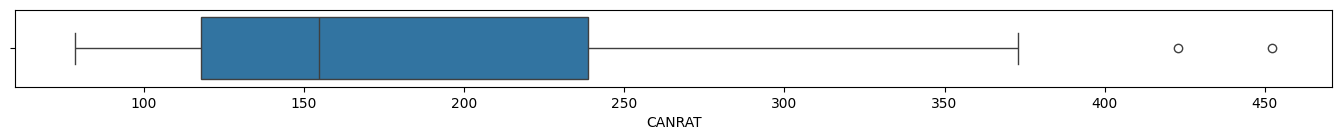

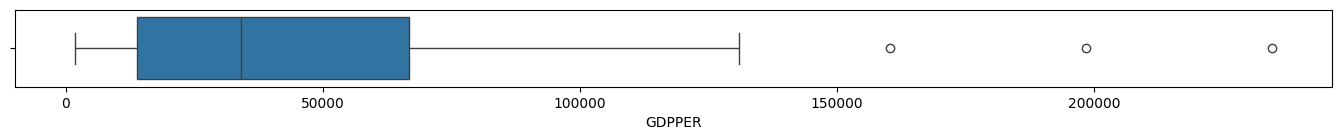

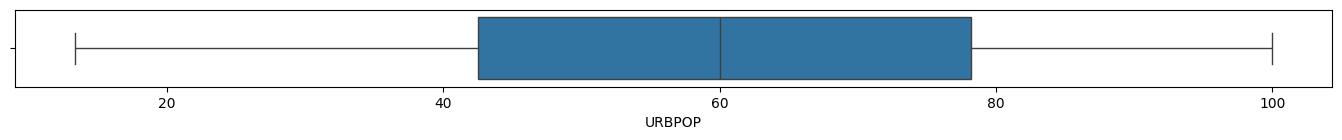

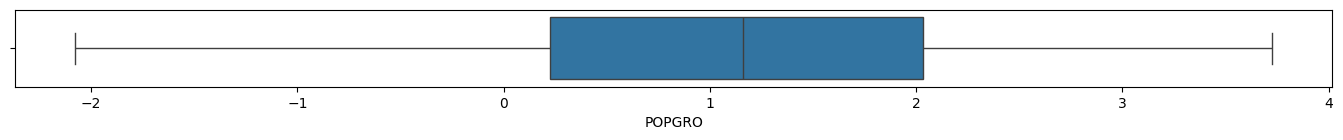

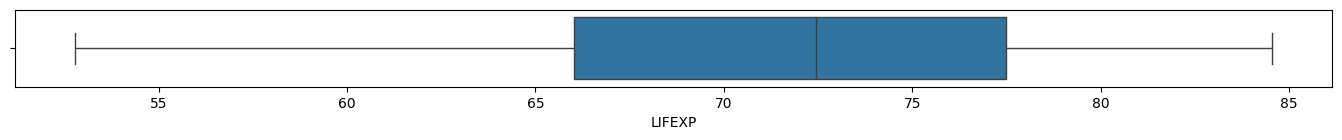

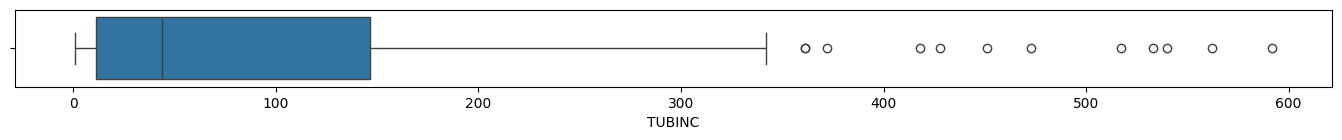

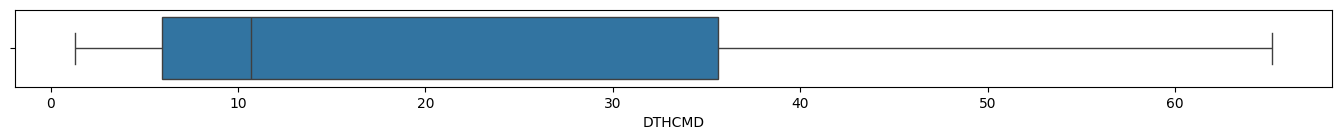

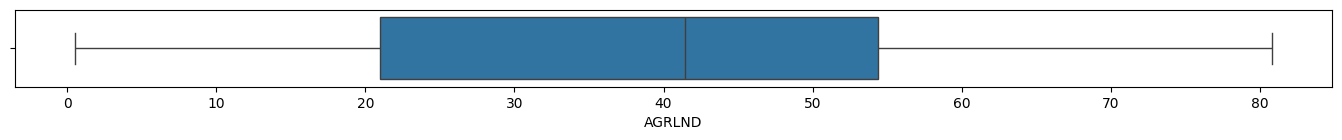

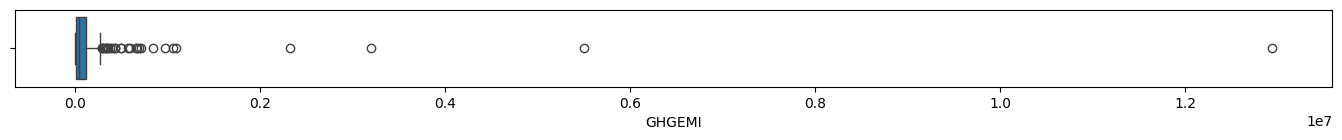

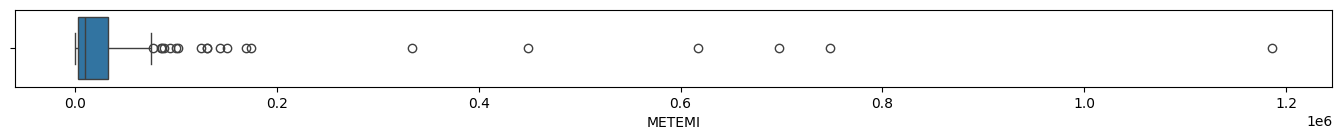

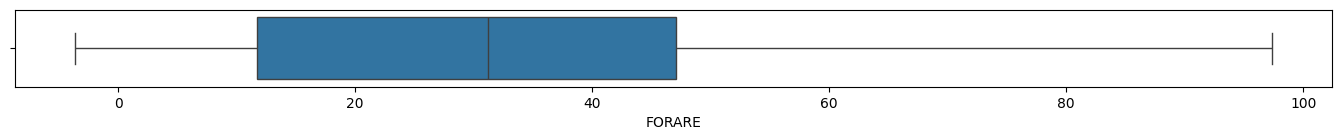

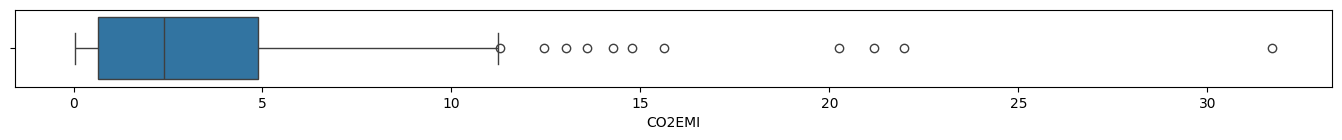

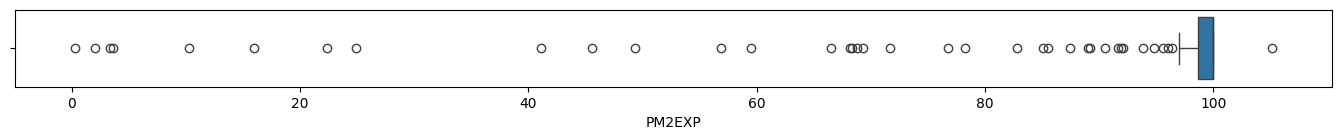

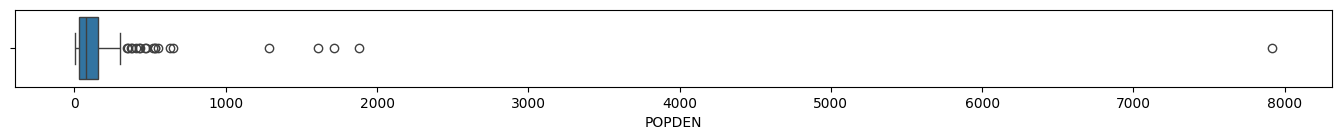

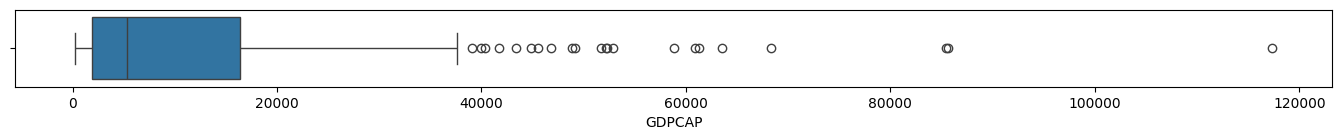

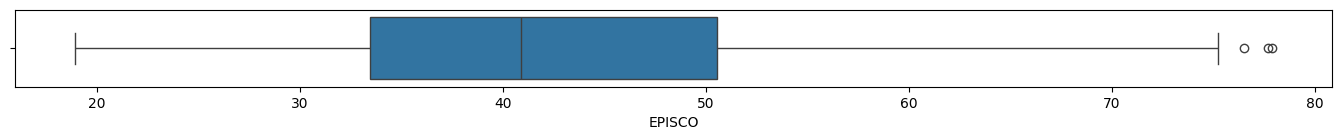

In [112]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in cancer_rate_imputed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_imputed_numeric, x=column)

### 1.4.4 Collinearity <a class="anchor" id="1.4.4"></a>

[Pearson’s Correlation Coefficient](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) is a parametric measure of the linear correlation for a pair of features by calculating the ratio between their covariance and the product of their standard deviations. The presence of high absolute correlation values indicate the univariate association between the numeric predictors and the numeric response.

1. Majority of the numeric variables reported moderate to high correlation which were statistically significant.
2. Among pairwise combinations of numeric variables, high Pearson.Correlation.Coefficient values were noted for:
    * <span style="color: #FF0000">GDPPER</span> and <span style="color: #FF0000">GDPCAP</span>: Pearson.Correlation.Coefficient = +0.921
    * <span style="color: #FF0000">GHGEMI</span> and <span style="color: #FF0000">METEMI</span>: Pearson.Correlation.Coefficient = +0.905
3. Among the highly correlated pairs, variables with the lowest correlation against the target variable were removed.
    * <span style="color: #FF0000">GDPPER</span>: Pearson.Correlation.Coefficient = +0.690
    * <span style="color: #FF0000">METEMI</span>: Pearson.Correlation.Coefficient = +0.062
4. The cleaned dataset is comprised of:
    * **163 rows** (observations)
    * **16 columns** (variables)
        * **1/16 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/16 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **13/16 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/16 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [113]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
def plot_correlation_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, 
                ax=ax,
                mask=mask,
                annot=True, 
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm', 
                linewidths=1, 
                linecolor='gray', 
                cbar_kws={'orientation': 'horizontal'})  

In [114]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# among pairs of numeric columns
##################################
cancer_rate_imputed_numeric_correlation_pairs = {}
cancer_rate_imputed_numeric_columns = cancer_rate_imputed_numeric.columns.tolist()
for numeric_column_a, numeric_column_b in itertools.combinations(cancer_rate_imputed_numeric_columns, 2):
    cancer_rate_imputed_numeric_correlation_pairs[numeric_column_a + '_' + numeric_column_b] = stats.pearsonr(
        cancer_rate_imputed_numeric.loc[:, numeric_column_a], 
        cancer_rate_imputed_numeric.loc[:, numeric_column_b])

In [115]:
##################################
# Formulating the pairwise correlation summary
# for all numeric columns
##################################
cancer_rate_imputed_numeric_summary = cancer_rate_imputed_numeric.from_dict(cancer_rate_imputed_numeric_correlation_pairs, orient='index')
cancer_rate_imputed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_rate_imputed_numeric_summary.sort_values(by=['Pearson.Correlation.Coefficient'], ascending=False).head(20))

,Pearson.Correlation.Coefficient,Correlation.PValue
GDPPER_GDPCAP,0.921009,8.173822e-68
GHGEMI_METEMI,0.905121,1.087643e-61
POPGRO_DTHCMD,0.759470,7.124695e-32
GDPPER_LIFEXP,0.755792,2.052275e-31
CANRAT_EPISCO,0.712599,1.445594e-26
CANRAT_GDPCAP,0.696991,4.991271e-25
GDPCAP_EPISCO,0.696707,5.312642e-25
CANRAT_LIFEXP,0.692318,1.379448e-24
CANRAT_GDPPER,0.686787,4.483016e-24
LIFEXP_GDPCAP,0.683834,8.321371e-24


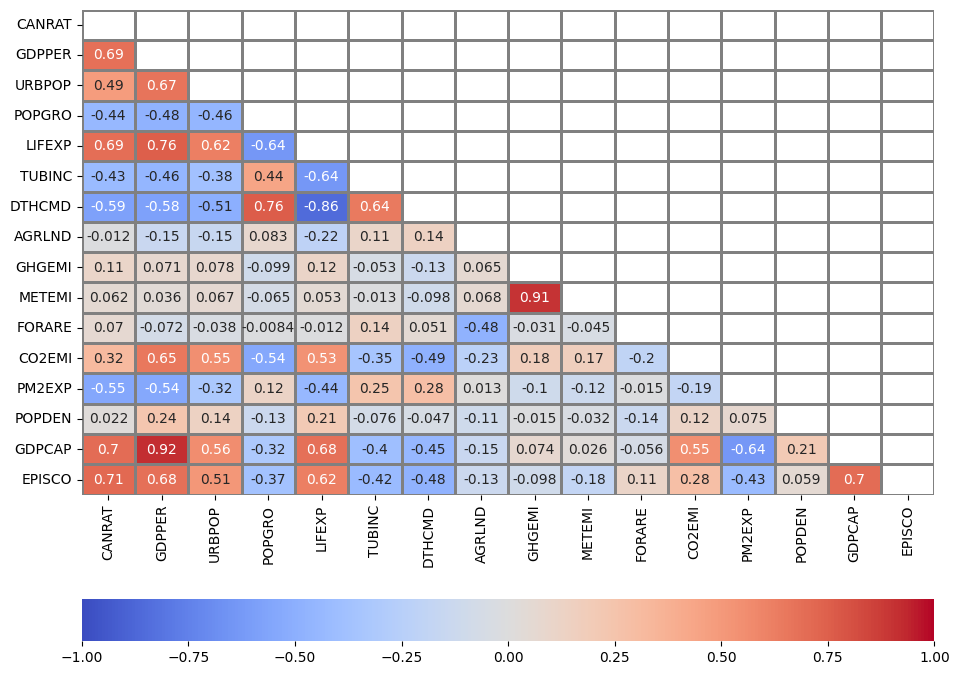

In [116]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
cancer_rate_imputed_numeric_correlation = cancer_rate_imputed_numeric.corr()
mask = np.triu(cancer_rate_imputed_numeric_correlation)
plot_correlation_matrix(cancer_rate_imputed_numeric_correlation,mask)
plt.show()

In [117]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
def correlation_significance(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

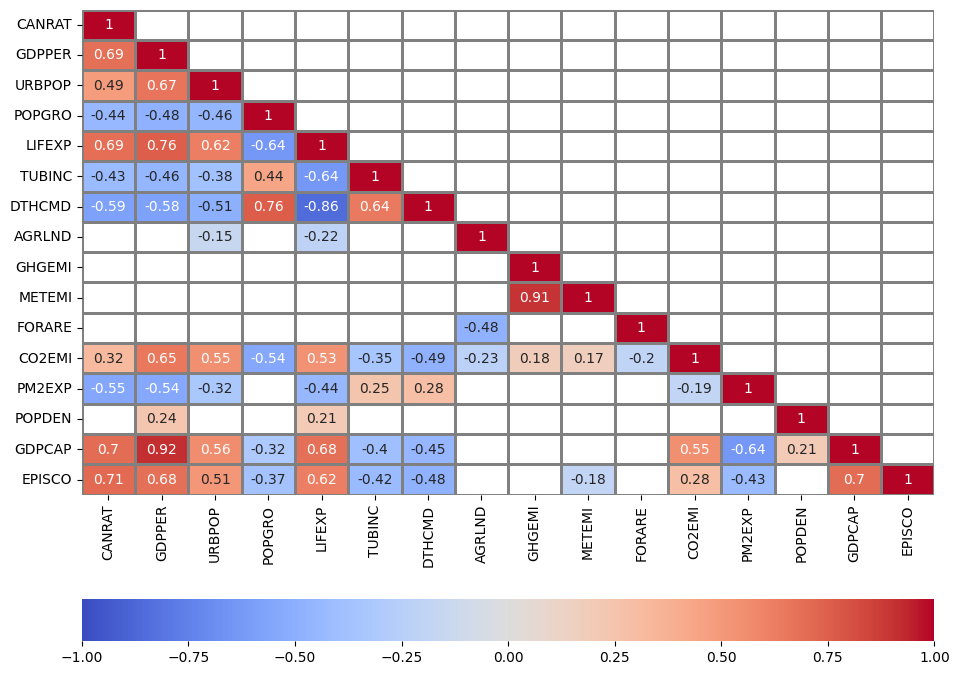

In [118]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
cancer_rate_imputed_numeric_correlation_p_values = correlation_significance(cancer_rate_imputed_numeric)                     
mask = np.invert(np.tril(cancer_rate_imputed_numeric_correlation_p_values<0.05)) 
plot_correlation_matrix(cancer_rate_imputed_numeric_correlation,mask)  

In [119]:
##################################
# Filtering out one among the 
# highly correlated variable pairs with
# lesser Pearson.Correlation.Coefficient
# when compared to the target variable
##################################
cancer_rate_imputed_numeric.drop(['GDPPER','METEMI'], inplace=True, axis=1)

In [120]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_imputed_numeric.shape)

Dataset Dimensions: 


(163, 14)

### 1.4.5 Shape Transformation <a class="anchor" id="1.4.5"></a>

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A Yeo-Johnson transformation was applied to all numeric variables to improve distributional shape.
2. Most variables achieved symmetrical distributions with minimal outliers after transformation.
3. One variable which remained skewed even after applying shape transformation was removed.
    * <span style="color: #FF0000">PM2EXP</span> 
4. The transformed dataset is comprised of:
    * **163 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/15 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/15 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/15 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [121]:
##################################
# Conducting a Yeo-Johnson Transformation
# to address the distributional
# shape of the variables
##################################
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
                                          standardize=False)
cancer_rate_imputed_numeric_array = yeo_johnson_transformer.fit_transform(cancer_rate_imputed_numeric)

In [122]:
##################################
# Formulating a new dataset object
# for the transformed data
##################################
cancer_rate_transformed_numeric = pd.DataFrame(cancer_rate_imputed_numeric_array,
                                               columns=cancer_rate_imputed_numeric.columns)

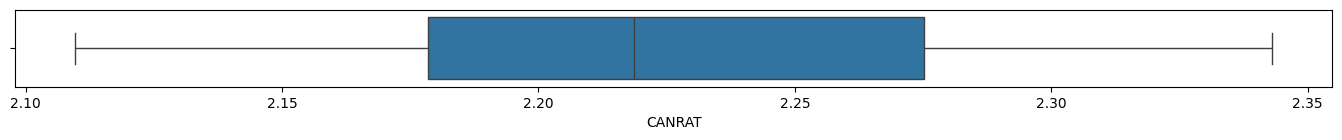

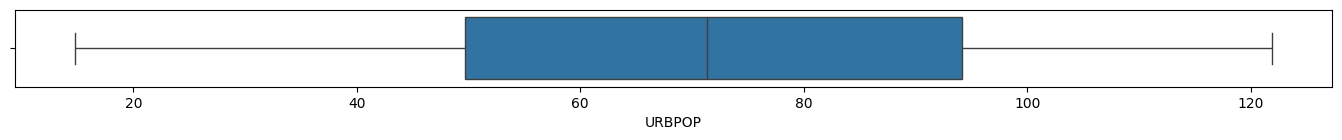

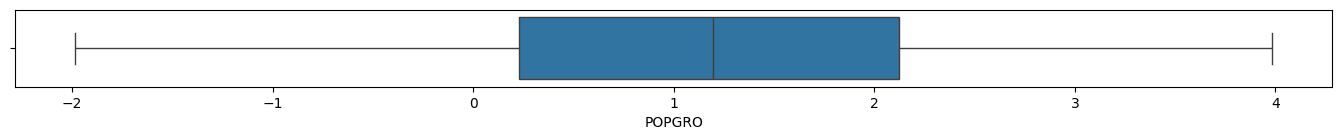

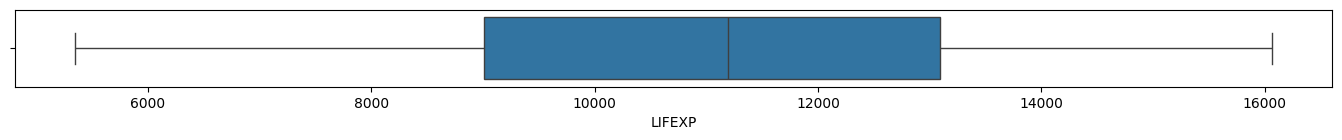

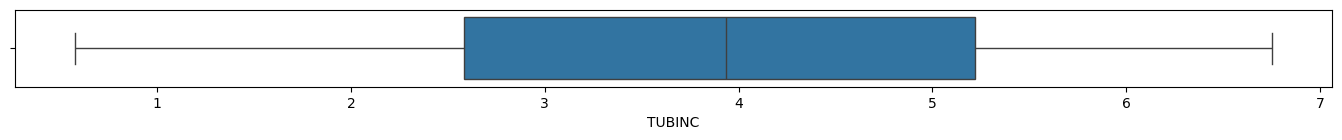

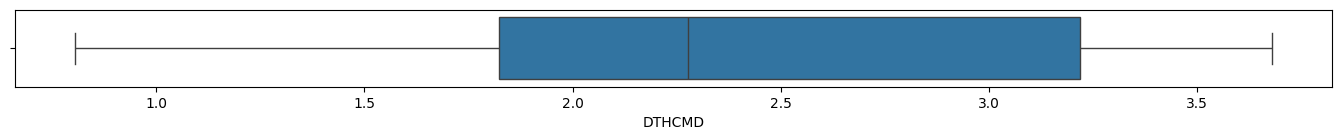

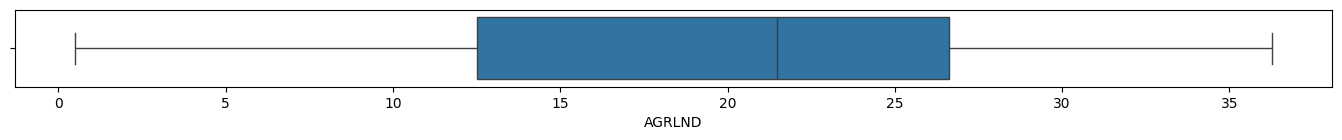

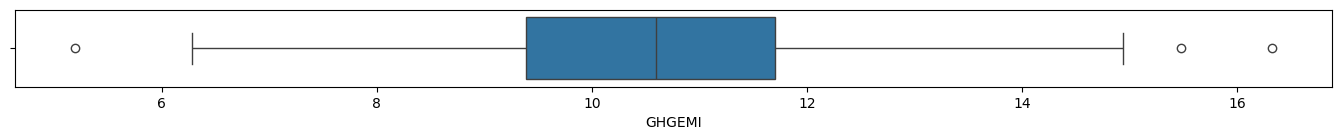

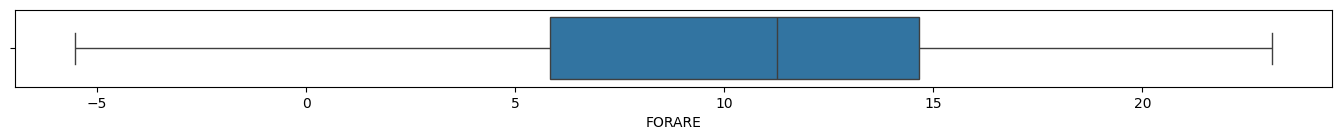

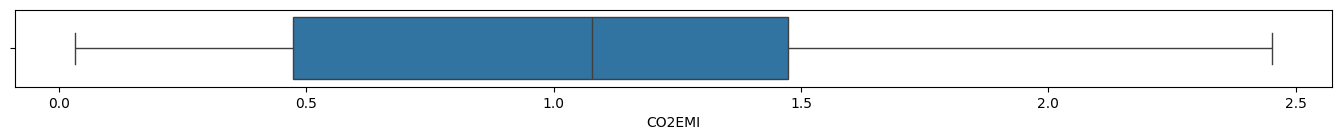

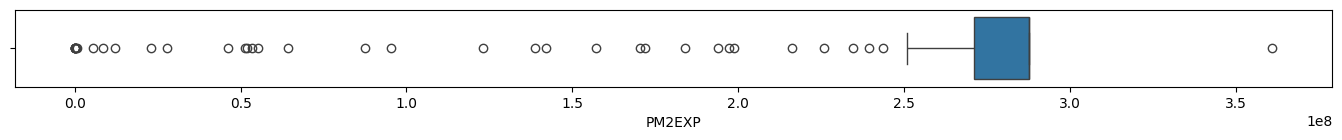

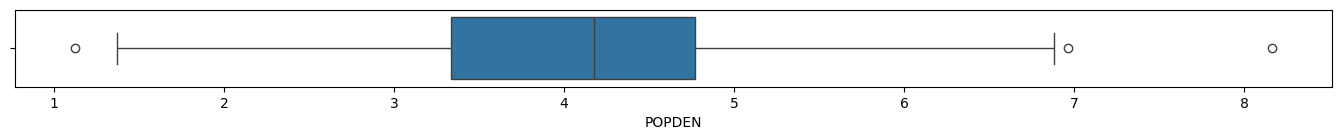

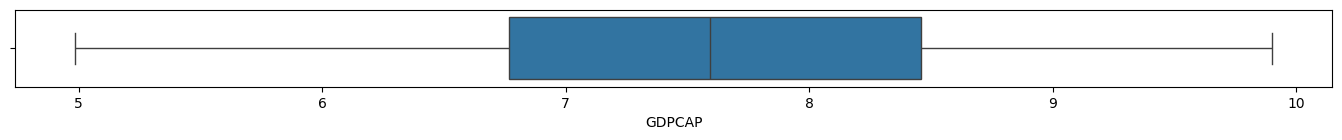

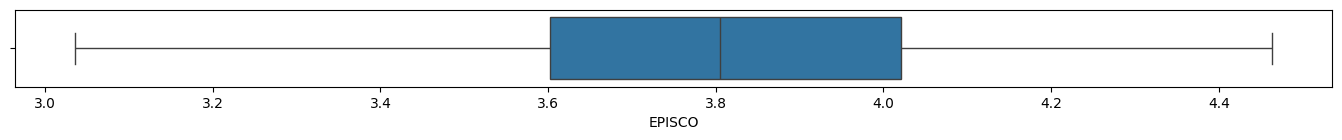

In [123]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_rate_transformed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_transformed_numeric, x=column)

In [124]:
##################################
# Filtering out the column
# which remained skewed even
# after applying shape transformation
##################################
cancer_rate_transformed_numeric.drop(['PM2EXP'], inplace=True, axis=1)

In [125]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_transformed_numeric.shape)

Dataset Dimensions: 


(163, 13)

### 1.4.6 Centering and Scaling <a class="anchor" id="1.4.6"></a>

1. All numeric variables were transformed using the standardization method to achieve a comparable scale between values.
4. The scaled dataset is comprised of:
    * **163 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/15 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/15 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/15 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [126]:
##################################
# Conducting standardization
# to transform the values of the 
# variables into comparable scale
##################################
standardization_scaler = StandardScaler()
cancer_rate_transformed_numeric_array = standardization_scaler.fit_transform(cancer_rate_transformed_numeric)

In [127]:
##################################
# Formulating a new dataset object
# for the scaled data
##################################
cancer_rate_scaled_numeric = pd.DataFrame(cancer_rate_transformed_numeric_array,
                                          columns=cancer_rate_transformed_numeric.columns)

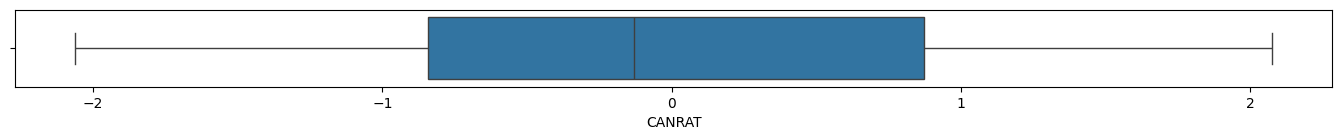

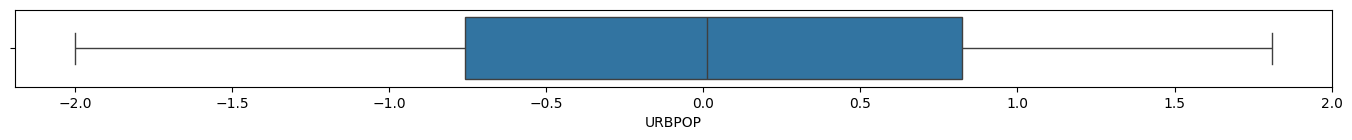

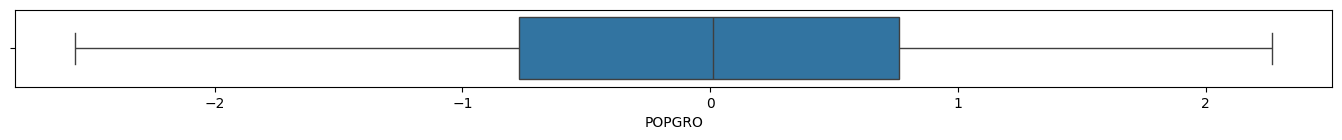

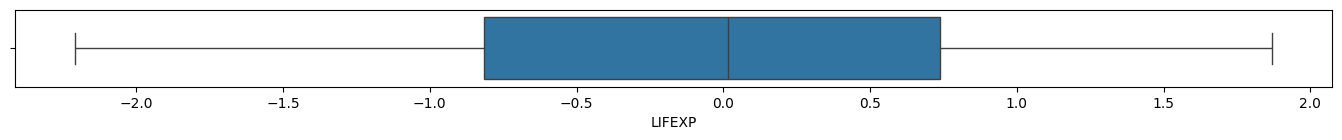

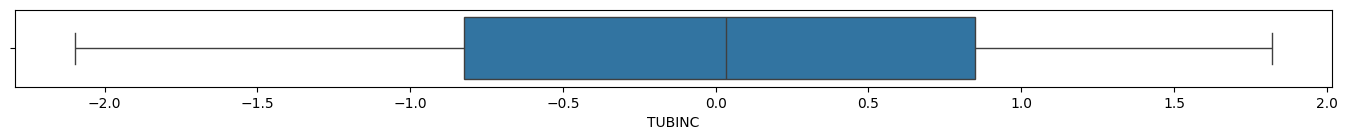

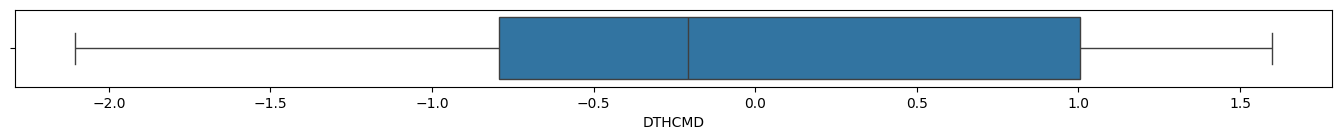

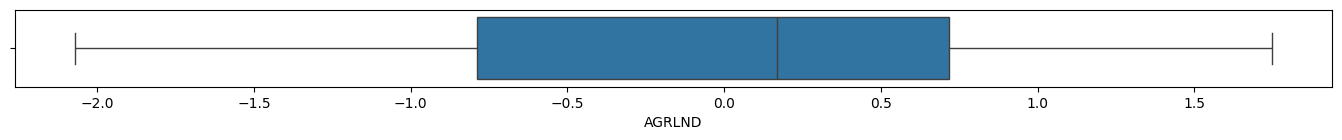

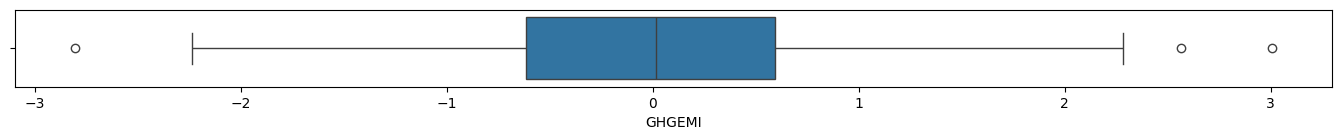

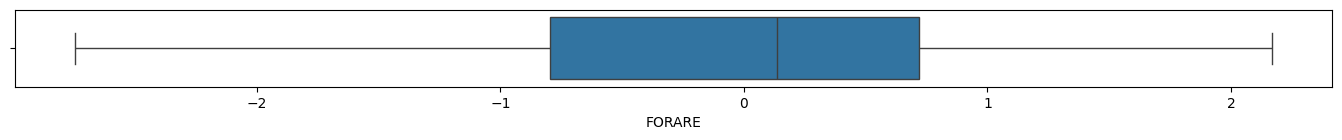

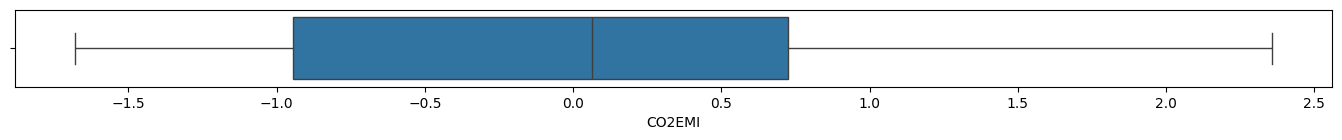

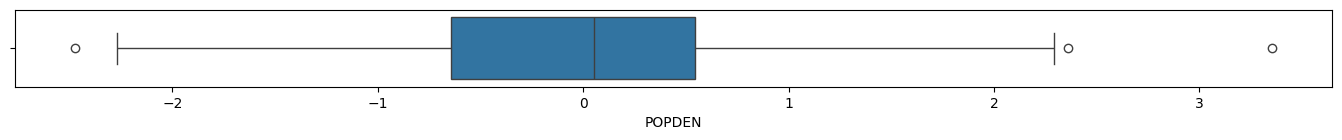

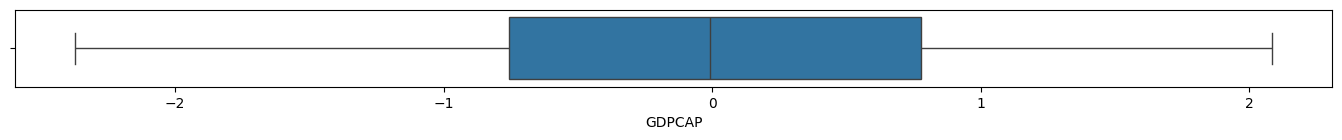

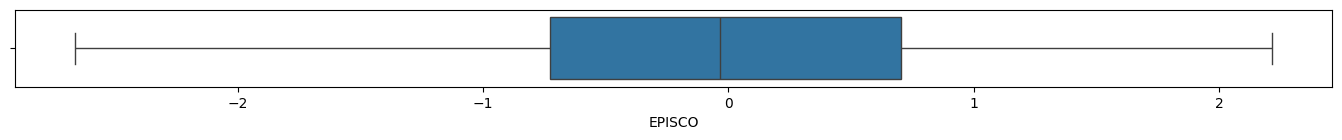

In [128]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_rate_scaled_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_scaled_numeric, x=column)

### 1.4.7 Data Encoding <a class="anchor" id="1.4.7"></a>

1. One-hot encoding was applied to the <span style="color: #FF0000">HDICAP_VH</span> variable resulting to 4 additional columns in the dataset:
    * <span style="color: #FF0000">HDICAP_L</span>
    * <span style="color: #FF0000">HDICAP_M</span>
    * <span style="color: #FF0000">HDICAP_H</span>
    * <span style="color: #FF0000">HDICAP_VH</span>

In [129]:
##################################
# Formulating the categorical column
# for encoding transformation
##################################
cancer_rate_categorical_encoded = pd.DataFrame(cancer_rate_cleaned_categorical.loc[:, 'HDICAT'].to_list(),
                                               columns=['HDICAT'])

In [130]:
##################################
# Applying a one-hot encoding transformation
# for the categorical column
##################################
cancer_rate_categorical_encoded = pd.get_dummies(cancer_rate_categorical_encoded, columns=['HDICAT'])

### 1.4.8 Preprocessed Data Description <a class="anchor" id="1.4.8"></a>

1. The preprocessed dataset is comprised of:
    * **163 rows** (observations)
    * **18 columns** (variables)
        * **1/18 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/18 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/18 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **4/18 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT_L</span>
             * <span style="color: #FF0000">HDICAT_M</span>
             * <span style="color: #FF0000">HDICAT_H</span>
             * <span style="color: #FF0000">HDICAT_VH</span>

In [131]:
##################################
# Consolidating both numeric columns
# and encoded categorical columns
##################################
cancer_rate_preprocessed = pd.concat([cancer_rate_scaled_numeric,cancer_rate_categorical_encoded], axis=1, join='inner')  

In [132]:
##################################
# Performing a general exploration of the consolidated dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_preprocessed.shape)

Dataset Dimensions: 


(163, 17)

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. Bivariate analysis identified individual predictors with generally linear relationship to the target variable based on visual inspection.
2. Increasing values for the following predictors correspond to higher <span style="color: #FF0000">CANRAT</span> measurements: 
    * <span style="color: #FF0000">URBPOP</span>
    * <span style="color: #FF0000">LIFEXP</span>    
    * <span style="color: #FF0000">CO2EMI</span>    
    * <span style="color: #FF0000">GDPCAP</span>    
    * <span style="color: #FF0000">EPISCO</span>    
    * <span style="color: #FF0000">HDICAP_VH</span>
3. Decreasing values for the following predictors correspond to higher <span style="color: #FF0000">CANRAT</span> measurements: 
    * <span style="color: #FF0000">POPGRO</span>
    * <span style="color: #FF0000">TUBINC</span>    
    * <span style="color: #FF0000">DTHCMD</span> 
    * <span style="color: #FF0000">HDICAP_L</span>
    * <span style="color: #FF0000">HDICAP_M</span>
4. Values for the following predictors did not affect <span style="color: #FF0000">CANRAT</span> measurements: 
    * <span style="color: #FF0000">AGRLND</span>
    * <span style="color: #FF0000">GHGEMI</span>    
    * <span style="color: #FF0000">FORARE</span> 
    * <span style="color: #FF0000">POPDEN</span> 
    * <span style="color: #FF0000">HDICAP_H</span>

In [133]:
##################################
# Segregating the target
# and predictor variable lists
##################################
cancer_rate_preprocessed_target = ['CANRAT']
cancer_rate_preprocessed_predictors = cancer_rate_preprocessed.drop('CANRAT', axis=1).columns

In [134]:
##################################
# Segregating the target
# and predictor variable names
##################################
y_variable = 'CANRAT'
x_variables = cancer_rate_preprocessed_predictors

In [135]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 8
num_cols = 2

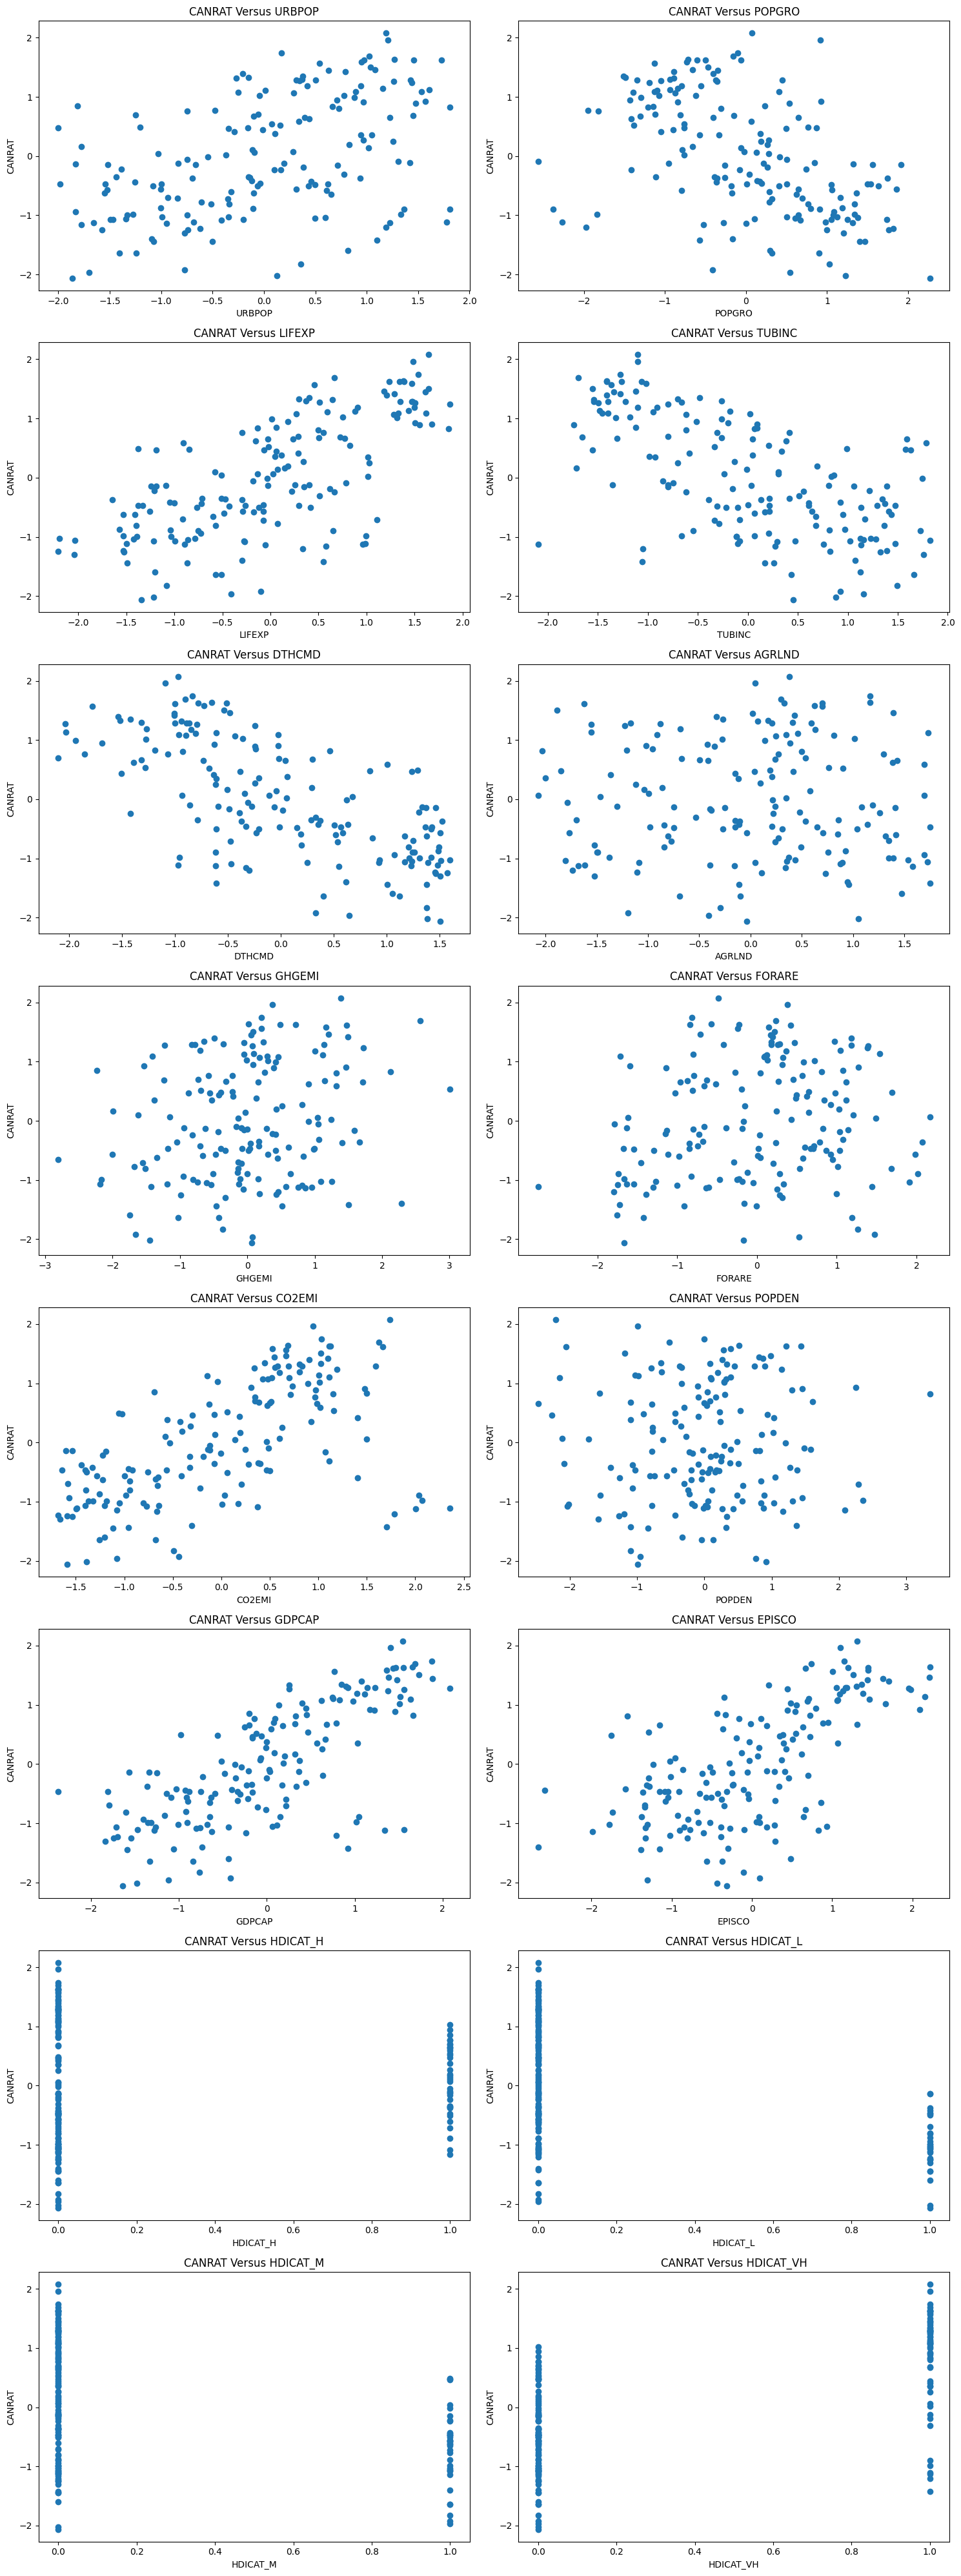

In [136]:
##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual scatterplots
# for all scaled numeric columns
##################################
for i, x_variable in enumerate(x_variables):
    ax = axes[i]
    ax.scatter(cancer_rate_preprocessed[x_variable],cancer_rate_preprocessed[y_variable])
    ax.set_title(f'{y_variable} Versus {x_variable}')
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictors to the <span style="color: #FF0000">CANRAT</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Pearson correlation coefficient is equal to zero 
    * **Alternative**: Pearson correlation coefficient is not equal to zero    
2. There is sufficient evidence to conclude of a statistically significant linear relationship between the <span style="color: #FF0000">CANRAT</span> target variable and 10 of the 12 numeric predictors given their high Pearson correlation coefficient values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">GDPCAP</span>: Pearson.Correlation.Coefficient=+0.735, Correlation.PValue=0.000
    * <span style="color: #FF0000">LIFEXP</span>: Pearson.Correlation.Coefficient=+0.702, Correlation.PValue=0.000   
    * <span style="color: #FF0000">DTHCMD</span>: Pearson.Correlation.Coefficient=-0.687, Correlation.PValue=0.000 
    * <span style="color: #FF0000">EPISCO</span>: Pearson.Correlation.Coefficient=+0.648, Correlation.PValue=0.000 
    * <span style="color: #FF0000">TUBINC</span>: Pearson.Correlation.Coefficient=+0.628, Correlation.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: Pearson.Correlation.Coefficient=+0.585, Correlation.PValue=0.000  
    * <span style="color: #FF0000">POPGRO</span>: Pearson.Correlation.Coefficient=-0.498, Correlation.PValue=0.000
    * <span style="color: #FF0000">URBPOP</span>: Pearson.Correlation.Coefficient=+0.479, Correlation.PValue=0.000   
    * <span style="color: #FF0000">GHGEMI</span>: Pearson.Correlation.Coefficient=+0.232, Correlation.PValue=0.002
    * <span style="color: #FF0000">FORARE</span>: Pearson.Correlation.Coefficient=+0.165, Correlation.PValue=0.035
3. The relationship between the categorical predictors to the <span style="color: #FF0000">CANRAT</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups 0 and 1 is equal to zero 
    * **Alternative**: Difference in the means between groups 0 and 1 is not equal to zero    
2. There is sufficient evidence to conclude of a statistically significant difference between the means of <span style="color: #FF0000">CANRAT</span> measurements obtained from groups 0 and 1 in 3 of the 4 categorical predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">HDICAT_VH</span>: T.Test.Statistic=-10.605, T.Test.PValue=0.000
    * <span style="color: #FF0000">HDICAT_L</span>: T.Test.Statistic=+6.559, T.Test.PValue=0.000   
    * <span style="color: #FF0000">HDICAT_M</span>: T.Test.Statistic=+5.104, T.Test.PValue=0.000 

In [137]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# between the target variable
# and numeric predictor columns
##################################
cancer_rate_preprocessed_numeric_correlation_target = {}
cancer_rate_preprocessed_numeric = cancer_rate_preprocessed.drop(['HDICAT_L','HDICAT_M','HDICAT_H','HDICAT_VH'], axis=1)
cancer_rate_preprocessed_numeric_columns = cancer_rate_preprocessed_numeric.columns.tolist()
for numeric_column in cancer_rate_preprocessed_numeric_columns:
    cancer_rate_preprocessed_numeric_correlation_target['CANRAT_' + numeric_column] = stats.pearsonr(
        cancer_rate_preprocessed_numeric.loc[:, 'CANRAT'], 
        cancer_rate_preprocessed_numeric.loc[:, numeric_column])

In [138]:
##################################
# Formulating the pairwise correlation summary
# between the target variable
# and numeric predictor columns
##################################
cancer_rate_preprocessed_numeric_summary = cancer_rate_preprocessed_numeric.from_dict(cancer_rate_preprocessed_numeric_correlation_target, orient='index')
cancer_rate_preprocessed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_rate_preprocessed_numeric_summary.sort_values(by=['Correlation.PValue'], ascending=True).head(13))

,Pearson.Correlation.Coefficient,Correlation.PValue
CANRAT_CANRAT,1.000000,0.000000e+00
CANRAT_GDPCAP,0.735131,5.617239e-29
CANRAT_LIFEXP,0.702430,1.491302e-25
CANRAT_DTHCMD,-0.687136,4.164564e-24
CANRAT_EPISCO,0.648431,8.136735e-21
CANRAT_TUBINC,-0.628877,2.503346e-19
CANRAT_CO2EMI,0.585452,2.251585e-16
CANRAT_POPGRO,-0.498457,1.278437e-11
CANRAT_URBPOP,0.479386,9.543704e-11
CANRAT_GHGEMI,0.232488,2.822914e-03


In [139]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and categorical predictor columns
##################################
cancer_rate_preprocessed_categorical_ttest_target = {}
cancer_rate_preprocessed_categorical = cancer_rate_preprocessed[['CANRAT','HDICAT_L','HDICAT_M','HDICAT_H','HDICAT_VH']]
cancer_rate_preprocessed_categorical_columns = ['HDICAT_L','HDICAT_M','HDICAT_H','HDICAT_VH']
for categorical_column in cancer_rate_preprocessed_categorical_columns:
    group_0 = cancer_rate_preprocessed_categorical[cancer_rate_preprocessed_categorical.loc[:,categorical_column]==0]
    group_1 = cancer_rate_preprocessed_categorical[cancer_rate_preprocessed_categorical.loc[:,categorical_column]==1]
    cancer_rate_preprocessed_categorical_ttest_target['CANRAT_' + categorical_column] = stats.ttest_ind(
        group_0['CANRAT'], 
        group_1['CANRAT'], 
        equal_var=True)

In [140]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and categorical predictor columns
##################################
cancer_rate_preprocessed_categorical_summary = cancer_rate_preprocessed_categorical.from_dict(cancer_rate_preprocessed_categorical_ttest_target, orient='index')
cancer_rate_preprocessed_categorical_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(cancer_rate_preprocessed_categorical_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(4))

,T.Test.Statistic,T.Test.PValue
CANRAT_HDICAT_VH,-10.605706,2.909971e-20
CANRAT_HDICAT_L,6.559780,7.003957e-10
CANRAT_HDICAT_M,5.104986,9.237518e-07
CANRAT_HDICAT_H,-0.635957,5.257075e-01


## 1.6. Linear Regression Model Coefficient Estimation <a class="anchor" id="1.6"></a>

### 1.6.1 Premodelling Data Description <a class="anchor" id="1.6.1"></a>

1. Among the predictor variables determined to have a statistically significant linear relationship between the <span style="color: #FF0000">CANRAT</span> target variable, only 2 were retained with absolute Pearson correlation coefficient values greater than 0.70. 
    * <span style="color: #FF0000">GDPCAP</span>: Pearson.Correlation.Coefficient=+0.735, Correlation.PValue=0.000
    * <span style="color: #FF0000">LIFEXP</span>: Pearson.Correlation.Coefficient=+0.702, Correlation.PValue=0.000   


In [141]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_rate_premodelling = cancer_rate_preprocessed.drop(['DTHCMD','EPISCO','TUBINC','CO2EMI','AGRLND','POPDEN','GHGEMI','FORARE','POPGRO','URBPOP','HDICAT_VH','HDICAT_H','HDICAT_M','HDICAT_L'], axis=1)

In [142]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_premodelling.shape)

Dataset Dimensions: 


(163, 3)

In [143]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate_premodelling.dtypes)

Column Names and Data Types:


CANRAT    float64
LIFEXP    float64
GDPCAP    float64
dtype: object

In [144]:
##################################
# Taking a snapshot of the dataset
##################################
cancer_rate_premodelling.head()

,CANRAT,LIFEXP,GDPCAP
0,2.076468,1.643195,1.549766
1,1.962991,1.487969,1.407752
2,1.742760,1.537044,1.879374
3,1.690866,0.664178,1.685426
4,1.634224,1.381877,1.657777


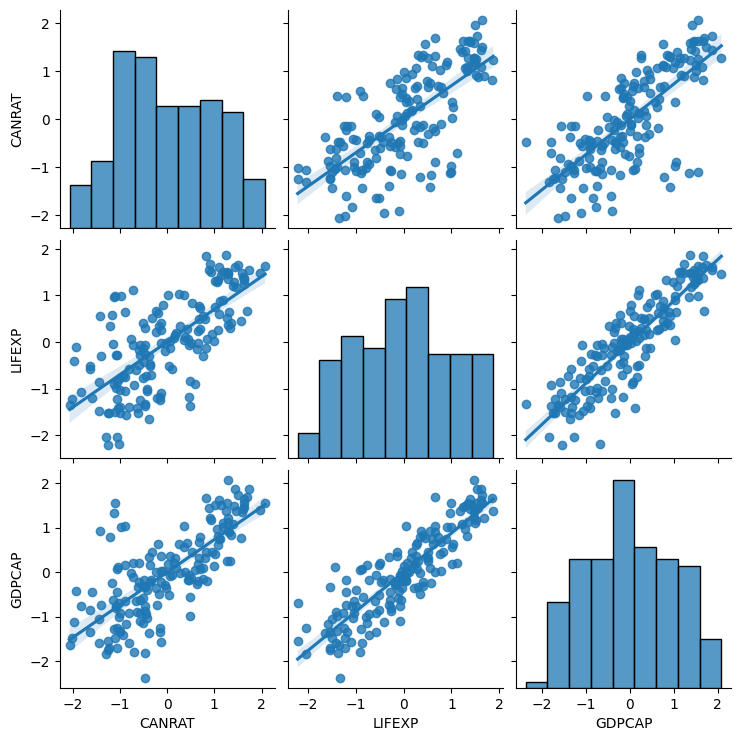

In [145]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_rate_premodelling, kind='reg')
plt.show()

In [146]:
##################################
# Separating the target 
# and predictor columns
##################################
X = cancer_rate_premodelling.drop('CANRAT', axis = 1)
y = cancer_rate_premodelling.CANRAT

In [147]:
##################################
# Formulating the train and test data
# using a 70-30 ratio
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.385, random_state= 88888888)

In [148]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_train.shape)

Dataset Dimensions: 


(100, 2)

### 1.6.2 Normal Equations <a class="anchor" id="1.6.2"></a>

[Normal Equations](https://www.semanticscholar.org/paper/Nouvelles-m%C3%A9thodes-pour-la-d%C3%A9termination-des-des-Legendre/21c9090e226ab449ffb608ddb2cb925911a61f24) are a system of equations whose solution is the Ordinary Least Squares (OLS) estimator of the regression coefficients and which are derived from the first-order condition of the least squares minimization problem. These equations are obtained by setting equal to zero the partial derivatives of the sum of squared errors (least squares). This approach is a closed-form solution and a one-step algorithm used to analytically find the coefficients that minimize the loss function.

1. Applying normal equations, the estimated linear regression coefficients for the given data are as follows:
    * <span style="color: #FF0000">INTERCEPT</span> = -0.03090
    * <span style="color: #FF0000">LIFEXP</span> = +0.24944
    * <span style="color: #FF0000">GDPCAP</span> = +0.51737
2. The [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented which generated the same regression coefficient estimates.
3. These estimated coefficients will be the baseline values from which all gradient descent algorithm-derived coefficients will be compared with.


In [149]:
##################################
# Defining the components
# for matrix algebra computations
# using Normal Equations
##################################
num_observations = X_train.shape[0]
constant_array = np.ones(num_observations)
x_train_matrix = np.array([constant_array,X_train.LIFEXP,X_train.GDPCAP]).T

In [150]:
##################################
# Consolidating the regression coefficients
# obtained using the Normal Equations
##################################
linear_regression_coefficients = pd.DataFrame(["INTERCEPT","LIFEXP","GDPCAP"])
linear_regression_estimates = pd.DataFrame(np.linalg.inv(np.dot(x_train_matrix.T,x_train_matrix)).dot(x_train_matrix.T).dot(y_train))
linear_regression_normal_equations = pd.concat([linear_regression_coefficients, linear_regression_estimates], axis=1)
linear_regression_normal_equations.columns = ['Coefficient', 'Estimate']
linear_regression_normal_equations.reset_index(inplace=True, drop=True)
display(linear_regression_normal_equations)

,Coefficient,Estimate
0,INTERCEPT,-0.030898
1,LIFEXP,0.249436
2,GDPCAP,0.517370


In [151]:
##################################
# Defining the linear regression model
# using the Scikit-Learn package
##################################
linear_regression = LinearRegression()

##################################
# Fitting a linear regression model
##################################
linear_regression.fit(X_train, y_train)

LinearRegression()

In [152]:
##################################
# Consolidating the regression coefficients
# obtained using the Scikit-Learn package
##################################
linear_regression_intercept = pd.DataFrame(zip(["INTERCEPT"], [linear_regression.intercept_]))
linear_regression_predictors = pd.DataFrame(zip(X_train.columns, linear_regression.coef_))
linear_regression_scikitlearn_estimates = pd.concat([linear_regression_intercept, linear_regression_predictors], axis=0)
linear_regression_scikitlearn_estimates.reset_index(inplace=True, drop=True)
linear_regression_method = pd.DataFrame(["Normal_Equations"]*3)
linear_regression_scikitlearn_computations = pd.concat([linear_regression_scikitlearn_estimates,linear_regression_method], axis=1)
linear_regression_scikitlearn_computations.columns = ['Coefficient', 'Estimate','Method']
linear_regression_scikitlearn_computations.reset_index(inplace=True, drop=True)
display(linear_regression_scikitlearn_computations)

,Coefficient,Estimate,Method
0,INTERCEPT,-0.030898,Normal_Equations
1,LIFEXP,0.249436,Normal_Equations
2,GDPCAP,0.517370,Normal_Equations


In [153]:
##################################
# Setting the regression coefficients
# determined using normal equations
# as the target coefficient estimates
##################################
intercept = -0.03090
theta_1 = 0.24944
theta_2 = 0.51737
theta_target = np.array([[intercept], [theta_1], [theta_2]])

In [154]:
##################################
# Setting the response variable format
##################################
y_train = np.array([y_train]).T

In [155]:
##################################
# Defining the function for
# computing the cost
##################################
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

In [156]:
##################################
# Computing the target cost
##################################
costs_minimum = compute_cost(X=x_train_matrix, y=y_train, theta=theta_target)
costs_minimum

np.float64(0.23360776606114267)

### 1.6.3 Batch Gradient Descent Algorithm with Low Learning Rate <a class="anchor" id="1.6.3"></a>

[Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) minimizes the loss function parameterized by the model’s coefficients based on the direction and learning rate factors which determine the partial derivative calculations of future iterations, allowing the algorithm to gradually arrive at the local or global minimum considered the point of convergence. 

[Batch Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) uses the entire training dataset to compute the gradients of the loss function with respect to the model parameters. The gradients are computed for all training examples simultaneously, and then the model parameters are updated accordingly. This approach provides the most accurate estimate of the gradient, as it considers all data points. However, it can be computationally expensive, especially for large datasets, because it requires processing the entire dataset in each iteration. Despite its computational cost, full batch gradient descent is guaranteed to converge to the global minimum of the loss function, assuming the learning rate is appropriately chosen and the loss function is convex.

1. The batch gradient descent algorithm was implemented with parameter settings described as follows:
    * <span style="color: #FF0000">Learning Rate</span> = 0.001 (Low)
    * <span style="color: #FF0000">Iteration</span> = 1000
    * <span style="color: #FF0000">Epochs</span> = 1000 (Gradient Computation Based on Complete 100 Cases)
2. The final cost estimate determined as 0.24303 at the 1000th epoch was not optimally low as compared to the minimum cost determined as 0.23361 using normal equations.
3. The cost function profile was stable during the epoch training process.
4. Applying the batch gradient descent algorithm with a low learning rate, the estimated linear regression coefficients for the given data are as follows:
    * <span style="color: #FF0000">INTERCEPT</span> = -0.00359 (Baseline = -0.03090)
    * <span style="color: #FF0000">LIFEXP</span> = +0.30548 (Baseline = +0.24944)
    * <span style="color: #FF0000">GDPCAP</span> = +0.32733 (Baseline = +0.51737)
5. The estimated coefficients using the batch gradient descent algorithm with a low learning rate were not fully optimized and comparable with the baseline coefficients using normal equations.


In [157]:
##################################
# Defining the function for implementing
# the full batch gradient descent algorithm
#################################
def full_batch_gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros((num_features, 1))
    costs = []
    theta_path = []
    for _ in range(num_iterations):
        gradient = (1 / num_samples) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        theta_path.append(theta.ravel().copy())
    return theta, costs, np.array(theta_path)

In [158]:
##################################
# Implementing the full batch gradient descent process
# for determining the regression coefficients
# using a low learning rate value
##################################
theta_full, costs_full, theta_path_full = full_batch_gradient_descent(X=x_train_matrix, y=y_train, learning_rate=0.001, num_iterations=1000)

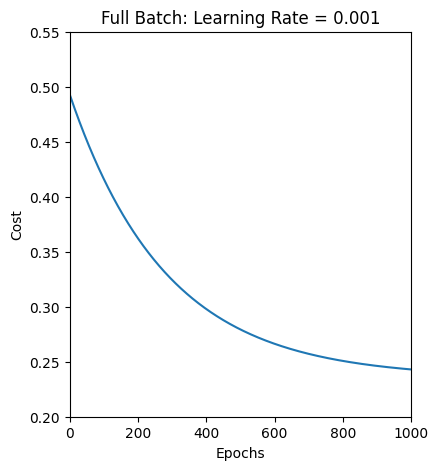

In [159]:
##################################
# Plotting the cost function profile
# for the full batch gradient descent process
# using a low learning rate value
##################################
fig = plt.figure(figsize=(4.4, 5))
plt.plot(range(len(costs_full)), costs_full)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim(0.20, 0.55)
plt.xlim(0,1000)
plt.title('Full Batch: Learning Rate = 0.001');

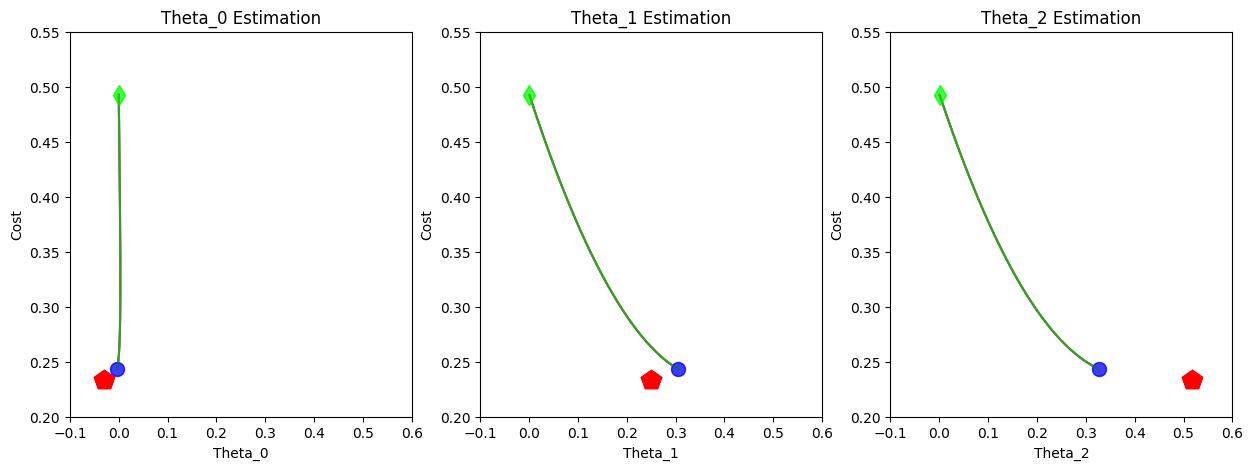

In [160]:
##################################
# Plotting the cost function profile
# for the full batch gradient descent process
# using a low learning rate value
# with respect to each individual coefficient estimate
##################################
plt.figure(figsize=(15, 5))
num_coeffs = x_train_matrix.shape[1]
for i in range(num_coeffs):
    plt.subplot(1, num_coeffs, i + 1)
    for j in range(num_coeffs):
        plt.plot(theta_path_full[:, i], costs_full, label='Theta {}'.format(i))
        plt.plot(theta_target[i], costs_minimum, marker='p', markersize=15, color='#FF0000')
        plt.plot(theta_path_full[0][i],costs_full[0], marker='d', markersize=10, color='#00FF0060')
        plt.plot(theta_path_full[-1][i],costs_full[-1], marker='o', markersize=10, color='#0000FF60')
    plt.ylim(0.20, 0.55)
    plt.xlim(-0.10,0.60)
    plt.xlabel('Theta_{}'.format(i))
    plt.ylabel('Cost')
    plt.title('Theta_{} Estimation'.format(i))

In [161]:
##################################
# Determining the final estimated loss
##################################
loss_vector_bgd_llearningrate = costs_full[-1]
loss_vector_bgd_llearningrate

np.float64(0.24303085033472172)

In [162]:
##################################
# Consolidating the regression coefficients
# obtained using the full batch gradient descent process
# with low learning rate
##################################
linear_regression_bgd_llearningrate_coefficients = pd.DataFrame(["INTERCEPT","LIFEXP","GDPCAP"])
linear_regression_bgd_llearningrate = pd.DataFrame(theta_path_full[-1])
linear_regression_bgd_llearningrate_method = pd.DataFrame(["BatchGradientDescent_LowLearningRate"]*3)
linear_regression_bgd_llearningrate_summary = pd.concat([linear_regression_bgd_llearningrate_coefficients, 
                                                         linear_regression_bgd_llearningrate,
                                                         linear_regression_bgd_llearningrate_method], axis=1)
linear_regression_bgd_llearningrate_summary.columns = ['Coefficient', 'Estimate', 'Method']
linear_regression_bgd_llearningrate_summary.reset_index(inplace=True, drop=True)
display(linear_regression_bgd_llearningrate_summary)

,Coefficient,Estimate,Method
0,INTERCEPT,-0.003588,BatchGradientDescent_LowLearningRate
1,LIFEXP,0.305487,BatchGradientDescent_LowLearningRate
2,GDPCAP,0.327332,BatchGradientDescent_LowLearningRate


### 1.6.4 Batch Gradient Descent Algorithm with High Learning Rate <a class="anchor" id="1.6.4"></a>

[Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) minimizes the loss function parameterized by the model’s coefficients based on the direction and learning rate factors which determine the partial derivative calculations of future iterations, allowing the algorithm to gradually arrive at the local or global minimum considered the point of convergence. 

[Batch Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) uses the entire training dataset to compute the gradients of the loss function with respect to the model parameters. The gradients are computed for all training examples simultaneously, and then the model parameters are updated accordingly. This approach provides the most accurate estimate of the gradient, as it considers all data points. However, it can be computationally expensive, especially for large datasets, because it requires processing the entire dataset in each iteration. Despite its computational cost, full batch gradient descent is guaranteed to converge to the global minimum of the loss function, assuming the learning rate is appropriately chosen and the loss function is convex.

1. The batch gradient descent algorithm was implemented with parameter settings described as follows:
    * <span style="color: #FF0000">Learning Rate</span> = 0.100 (High)
    * <span style="color: #FF0000">Iteration</span> = 1000
    * <span style="color: #FF0000">Epochs</span> = 1000 (Gradient Computation Based on Complete 100 Cases)
2. The final cost estimate determined as 0.23361 at the 1000th epoch was optimally low as compared to the minimum cost determined as 0.23361 using normal equations.
3. The cost function profile was stable during the epoch training process.
4. Applying the batch gradient descent algorithm with a low learning rate, the estimated linear regression coefficients for the given data are as follows:
    * <span style="color: #FF0000">INTERCEPT</span> = -0.03090 (Baseline = -0.03090)
    * <span style="color: #FF0000">LIFEXP</span> = +0.24944 (Baseline = +0.24944)
    * <span style="color: #FF0000">GDPCAP</span> = +0.51737 (Baseline = +0.51737)
5. The estimated coefficients using the batch gradient descent algorithm with a high learning rate were fully optimized and comparable with the baseline coefficients using normal equations. 


In [163]:
##################################
# Implementing the full batch gradient descent process
# for determining the regression coefficients
# using a high learning rate value
##################################
theta_full, costs_full, theta_path_full = full_batch_gradient_descent(X=x_train_matrix, y=y_train, learning_rate=0.100, num_iterations=1000)

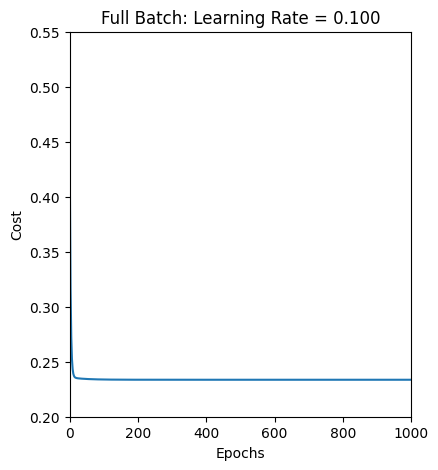

In [164]:
##################################
# Plotting the cost function profile
# for the full batch gradient descent process
# using a high learning rate value
##################################
fig = plt.figure(figsize=(4.4, 5))
plt.plot(range(len(costs_full)), costs_full)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim(0.20, 0.55)
plt.xlim(0,1000)
plt.title('Full Batch: Learning Rate = 0.100');

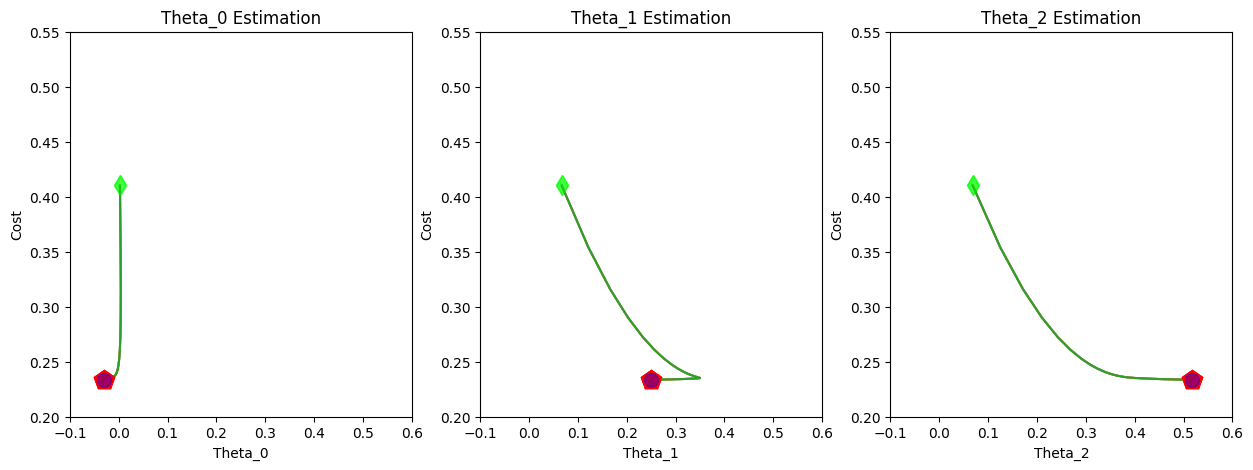

In [165]:
##################################
# Plotting the cost function profile
# for the full batch gradient descent process
# using a high learning rate value
# with respect to each individual coefficient estimate
##################################
plt.figure(figsize=(15, 5))
num_coeffs = x_train_matrix.shape[1]
for i in range(num_coeffs):
    plt.subplot(1, num_coeffs, i + 1)
    for j in range(num_coeffs):
        plt.plot(theta_path_full[:, i], costs_full, label='Theta {}'.format(i))
        plt.plot(theta_target[i], costs_minimum, marker='p', markersize=15, color='#FF0000')
        plt.plot(theta_path_full[0][i],costs_full[0], marker='d', markersize=10, color='#00FF0060')
        plt.plot(theta_path_full[-1][i],costs_full[-1], marker='o', markersize=10, color='#0000FF60')
    plt.ylim(0.20, 0.55)
    plt.xlim(-0.10,0.60)
    plt.xlabel('Theta_{}'.format(i))
    plt.ylabel('Cost')
    plt.title('Theta_{} Estimation'.format(i))

In [166]:
##################################
# Determining the final estimated loss
##################################
loss_vector_bgd_hlearningrate = costs_full[-1]
loss_vector_bgd_hlearningrate

np.float64(0.23360776605265446)

In [167]:
##################################
# Consolidating the regression coefficients
# obtained using the full batch gradient descent process
# with high learning rate
##################################
linear_regression_bgd_hlearningrate_coefficients = pd.DataFrame(["INTERCEPT","LIFEXP","GDPCAP"])
linear_regression_bgd_hlearningrate = pd.DataFrame(theta_path_full[-1])
linear_regression_bgd_hlearningrate_method = pd.DataFrame(["BatchGradientDescent_HighLearningRate"]*3)
linear_regression_bgd_hlearningrate_summary = pd.concat([linear_regression_bgd_hlearningrate_coefficients, 
                                                         linear_regression_bgd_hlearningrate,
                                                         linear_regression_bgd_hlearningrate_method], axis=1)
linear_regression_bgd_hlearningrate_summary.columns = ['Coefficient', 'Estimate', 'Method']
linear_regression_bgd_hlearningrate_summary.reset_index(inplace=True, drop=True)
display(linear_regression_bgd_hlearningrate_summary)

,Coefficient,Estimate,Method
0,INTERCEPT,-0.030898,BatchGradientDescent_HighLearningRate
1,LIFEXP,0.249438,BatchGradientDescent_HighLearningRate
2,GDPCAP,0.517368,BatchGradientDescent_HighLearningRate


### 1.6.5 Stochastic Gradient Descent Algorithm with Low Learning Rate <a class="anchor" id="1.6.5"></a>

[Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) minimizes the loss function parameterized by the model’s coefficients based on the direction and learning rate factors which determine the partial derivative calculations of future iterations, allowing the algorithm to gradually arrive at the local or global minimum considered the point of convergence. 

[Stochastic Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) uses only one randomly selected training example at each iteration to compute the gradient of the loss function. The model parameters are updated based on the gradient computed from this single example. Since this approach updates the parameters more frequently with noisy estimates of the gradient, it tends to have more frequent but noisy updates, leading to faster convergence in terms of wall-clock time compared to full batch gradient descent. However, the stochastic nature of the updates can cause oscillations in the training process, and the updates may not accurately represent the true direction of the gradient.

1. The stochastic gradient descent algorithm was implemented with parameter settings described as follows:
    * <span style="color: #FF0000">Learning Rate</span> = 0.001 (Low)
    * <span style="color: #FF0000">Iteration</span> = 10
    * <span style="color: #FF0000">Epochs</span> = 1000 (Gradient Computation Based on 1 Randomly Sampled Case)
2. The final cost estimate determined as 0.24047 at the 1000th epoch was not optimally low as compared to the minimum cost determined as 0.23361 using normal equations.
3. The cost function profile was completely unstable during the epoch training process.
4. Applying the stochastic gradient descent algorithm with a low learning rate, the estimated linear regression coefficients for the given data are as follows:
    * <span style="color: #FF0000">INTERCEPT</span> = +0.02196 (Baseline = -0.03090)
    * <span style="color: #FF0000">LIFEXP</span> = +0.32418 (Baseline = +0.24944)
    * <span style="color: #FF0000">GDPCAP</span> = +0.34225 (Baseline = +0.51737)
5. The estimated coefficients using the stochastic gradient descent algorithm with a low learning rate were not fully optimized and comparable with the baseline coefficients using normal equations.


In [168]:
##################################
# Defining the function for implementing
# the stochastic gradient descent algorithm
#################################
def stochastic_gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros((num_features, 1))
    costs = []
    theta_path = []
    for _ in range(num_iterations):
        for i in range(num_samples):
            random_index = np.random.randint(num_samples)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradient
            cost = compute_cost(X, y, theta)
            costs.append(cost)
            theta_path.append(theta.ravel().copy())
    return theta, costs, np.array(theta_path)

In [169]:
##################################
# Implementing the stochastic gradient descent process
# for determining the regression coefficients
# using a low learning rate value
##################################
theta_stochastic, costs_stochastic, theta_path_stochastic = stochastic_gradient_descent(X=x_train_matrix, y=y_train, learning_rate=0.001, num_iterations=10)

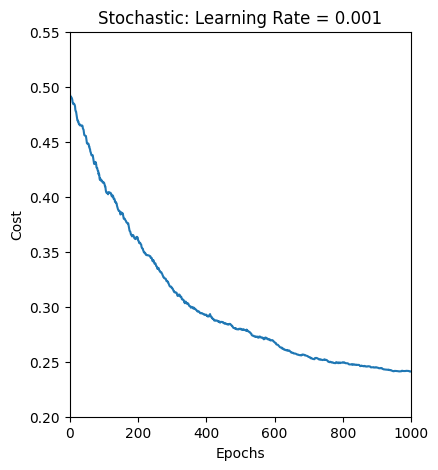

In [170]:
##################################
# Plotting the cost function profile
# for the stochastic gradient descent process
# using a low learning rate value
##################################
fig = plt.figure(figsize=(4.4, 5))
plt.plot(range(len(costs_stochastic)), costs_stochastic)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim(0.20, 0.55)
plt.xlim(0,1000)
plt.title('Stochastic: Learning Rate = 0.001');

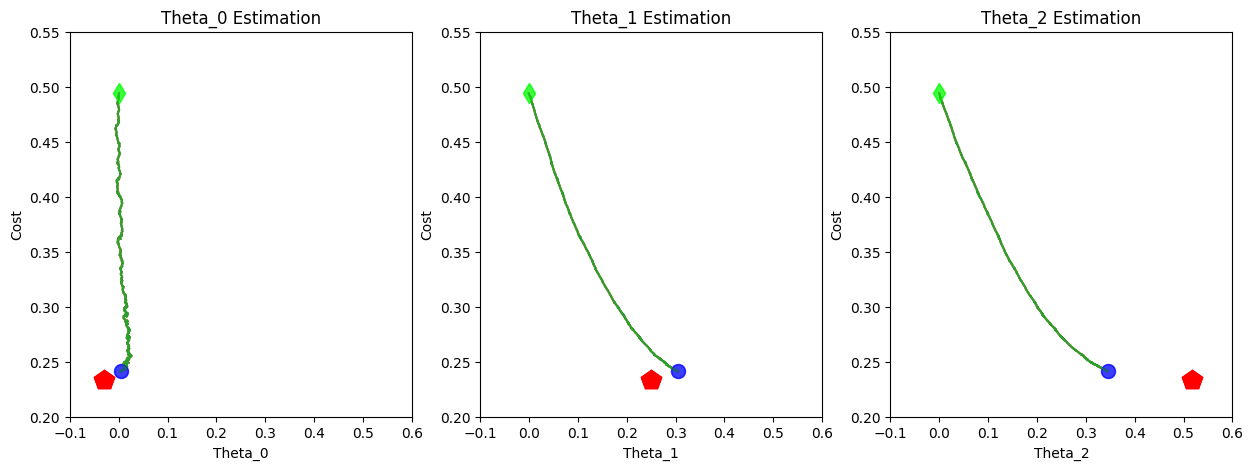

In [171]:
##################################
# Plotting the cost function profile
# for the stochastic gradient descent process
# using a low learning rate value
# with respect to each individual coefficient estimate
##################################
plt.figure(figsize=(15, 5))
num_coeffs = x_train_matrix.shape[1]
for i in range(num_coeffs):
    plt.subplot(1, num_coeffs, i + 1)
    for j in range(num_coeffs):
        plt.plot(theta_path_stochastic[:, i], costs_stochastic, label='Theta {}'.format(i))
        plt.plot(theta_target[i], costs_minimum, marker='p', markersize=15, color='#FF0000')
        plt.plot(theta_path_stochastic[0][i],costs_stochastic[0], marker='d', markersize=10, color='#00FF0060')
        plt.plot(theta_path_stochastic[-1][i],costs_stochastic[-1], marker='o', markersize=10, color='#0000FF60')
    plt.ylim(0.20, 0.55)
    plt.xlim(-0.10,0.60)
    plt.xlabel('Theta_{}'.format(i))
    plt.ylabel('Cost')
    plt.title('Theta_{} Estimation'.format(i))


In [172]:
##################################
# Determining the final estimated loss
##################################
loss_vector_sgd_llearningrate = costs_stochastic[-1]
loss_vector_sgd_llearningrate

np.float64(0.24109577281799918)

In [173]:
##################################
# Consolidating the regression coefficients
# obtained using the stochastic gradient descent process
# with low learning rate
##################################
linear_regression_sgd_llearningrate_coefficients = pd.DataFrame(["INTERCEPT","LIFEXP","GDPCAP"])
linear_regression_sgd_llearningrate = pd.DataFrame(theta_path_stochastic[-1])
linear_regression_sgd_llearningrate_method = pd.DataFrame(["StochasticGradientDescent_LowLearningRate"]*3)
linear_regression_sgd_llearningrate_summary = pd.concat([linear_regression_sgd_llearningrate_coefficients, 
                                                         linear_regression_sgd_llearningrate,
                                                         linear_regression_sgd_llearningrate_method], axis=1)
linear_regression_sgd_llearningrate_summary.columns = ['Coefficient', 'Estimate', 'Method']
linear_regression_sgd_llearningrate_summary.reset_index(inplace=True, drop=True)
display(linear_regression_sgd_llearningrate_summary)


,Coefficient,Estimate,Method
0,INTERCEPT,0.005041,StochasticGradientDescent_LowLearningRate
1,LIFEXP,0.305187,StochasticGradientDescent_LowLearningRate
2,GDPCAP,0.345268,StochasticGradientDescent_LowLearningRate


### 1.6.6 Stochastic Gradient Descent Algorithm with High Learning Rate <a class="anchor" id="1.6.6"></a>

[Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) minimizes the loss function parameterized by the model’s coefficients based on the direction and learning rate factors which determine the partial derivative calculations of future iterations, allowing the algorithm to gradually arrive at the local or global minimum considered the point of convergence. 

[Stochastic Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) uses only one randomly selected training example at each iteration to compute the gradient of the loss function. The model parameters are updated based on the gradient computed from this single example. Since this approach updates the parameters more frequently with noisy estimates of the gradient, it tends to have more frequent but noisy updates, leading to faster convergence in terms of wall-clock time compared to full batch gradient descent. However, the stochastic nature of the updates can cause oscillations in the training process, and the updates may not accurately represent the true direction of the gradient.

1. The stochastic gradient descent algorithm was implemented with parameter settings described as follows:
    * <span style="color: #FF0000">Learning Rate</span> = 0.100 (High)
    * <span style="color: #FF0000">Iteration</span> = 10
    * <span style="color: #FF0000">Epochs</span> = 1000 (Gradient Computation Based on 1 Randomly Sampled Case)
2. The final cost estimate determined as 0.24382 at the 1000th epoch was not optimally low as compared to the minimum cost determined as 0.23361 using normal equations.
3. The cost function profile was completely unstable during the epoch training process.
4. Applying the stochastic gradient descent algorithm with a high learning rate, the estimated linear regression coefficients for the given data are as follows:
    * <span style="color: #FF0000">INTERCEPT</span> = +0.01252 (Baseline = -0.03090)
    * <span style="color: #FF0000">LIFEXP</span> = +0.46349 (Baseline = +0.24944)
    * <span style="color: #FF0000">GDPCAP</span> = +0.41938 (Baseline = +0.51737)
5. The estimated coefficients using the stochastic gradient descent algorithm with a high learning rate were not fully optimized and comparable with the baseline coefficients using normal equations.


In [174]:
##################################
# Implementing the stochastic gradient descent process
# for determining the regression coefficients
# using a high learning rate value
##################################
theta_stochastic, costs_stochastic, theta_path_stochastic = stochastic_gradient_descent(X=x_train_matrix, y=y_train, learning_rate=0.100, num_iterations=10)

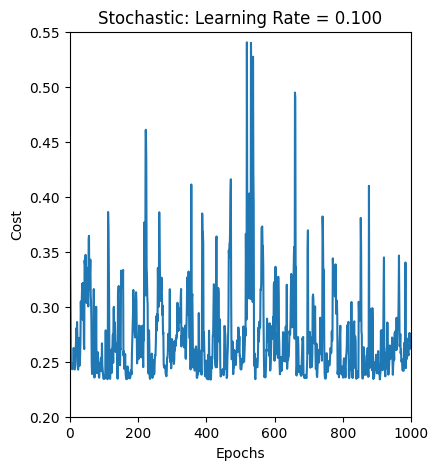

In [175]:
##################################
# Plotting the cost function profile
# for the stochastic gradient descent process
# using a high learning rate value
##################################
fig = plt.figure(figsize=(4.4, 5))
plt.plot(range(len(costs_stochastic)), costs_stochastic)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim(0.20, 0.55)
plt.xlim(0,1000)
plt.title('Stochastic: Learning Rate = 0.100');

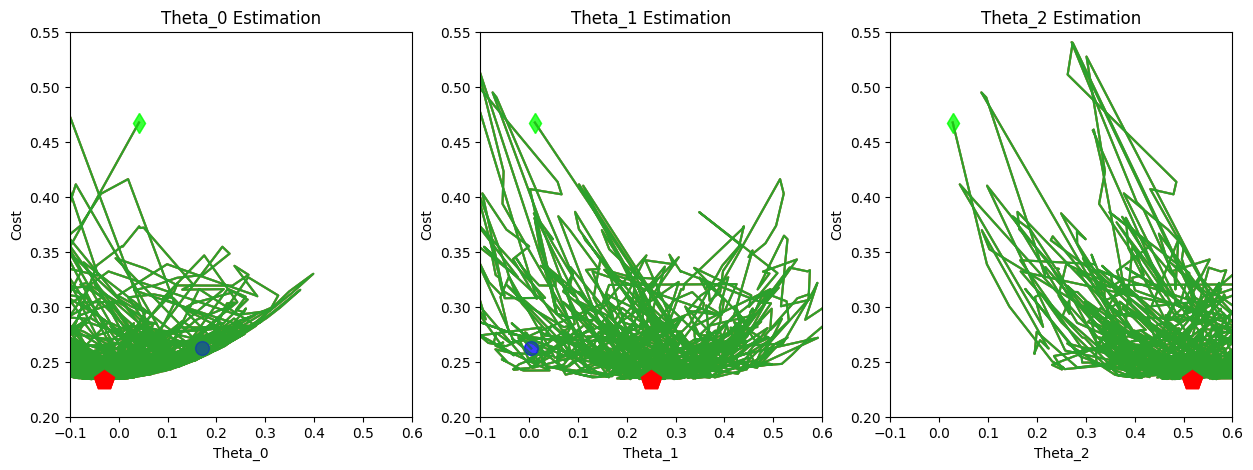

In [176]:
##################################
# Plotting the cost function profile
# for the stochastic gradient descent process
# using a high learning rate value
# with respect to each individual coefficient estimate
##################################
plt.figure(figsize=(15, 5))
num_coeffs = x_train_matrix.shape[1]
for i in range(num_coeffs):
    plt.subplot(1, num_coeffs, i + 1)
    for j in range(num_coeffs):
        plt.plot(theta_path_stochastic[:, i], costs_stochastic, label='Theta {}'.format(i))
        plt.plot(theta_target[i], costs_minimum, marker='p', markersize=15, color='#FF0000')
        plt.plot(theta_path_stochastic[0][i],costs_stochastic[0], marker='d', markersize=10, color='#00FF0060')
        plt.plot(theta_path_stochastic[-1][i],costs_stochastic[-1], marker='o', markersize=10, color='#0000FF60')
    plt.ylim(0.20, 0.55)
    plt.xlim(-0.10,0.60)
    plt.xlabel('Theta_{}'.format(i))
    plt.ylabel('Cost')
    plt.title('Theta_{} Estimation'.format(i))


In [177]:
##################################
# Determining the final estimated loss
##################################
loss_vector_sgd_hlearningrate = costs_stochastic[-1]
loss_vector_sgd_hlearningrate

np.float64(0.2619685605234064)

In [178]:
##################################
# Consolidating the regression coefficients
# obtained using the stochastic gradient descent process
# with high learning rate
##################################
linear_regression_sgd_hlearningrate_coefficients = pd.DataFrame(["INTERCEPT","LIFEXP","GDPCAP"])
linear_regression_sgd_hlearningrate = pd.DataFrame(theta_path_stochastic[-1])
linear_regression_sgd_hlearningrate_method = pd.DataFrame(["StochasticGradientDescent_HighLearningRate"]*3)
linear_regression_sgd_hlearningrate_summary = pd.concat([linear_regression_sgd_hlearningrate_coefficients, 
                                                         linear_regression_sgd_hlearningrate,
                                                         linear_regression_sgd_hlearningrate_method], axis=1)
linear_regression_sgd_hlearningrate_summary.columns = ['Coefficient', 'Estimate', 'Method']
linear_regression_sgd_hlearningrate_summary.reset_index(inplace=True, drop=True)
display(linear_regression_sgd_hlearningrate_summary)


,Coefficient,Estimate,Method
0,INTERCEPT,0.169979,StochasticGradientDescent_HighLearningRate
1,LIFEXP,0.004367,StochasticGradientDescent_HighLearningRate
2,GDPCAP,0.690416,StochasticGradientDescent_HighLearningRate


### 1.6.7 Mini-Batch Gradient Descent Algorithm with Low Learning Rate <a class="anchor" id="1.6.7"></a>

[Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) minimizes the loss function parameterized by the model’s coefficients based on the direction and learning rate factors which determine the partial derivative calculations of future iterations, allowing the algorithm to gradually arrive at the local or global minimum considered the point of convergence. 

[Mini-Batch Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) serves as a compromise between full batch gradient descent and stochastic gradient descent. Instead of processing the entire dataset or just one example at a time, mini-batch gradient descent divides the dataset into small batches of fixed size. The gradients are computed for each mini-batch, and the model parameters are updated based on the average gradient computed from the mini-batch. This approach combines the advantages of both full batch and stochastic gradient descent. It provides more stable updates compared to stochastic gradient descent while being computationally more efficient than full batch gradient descent. The batch size can be adjusted based on computational resources and desired convergence properties.

1. The mini-batch gradient descent algorithm was implemented with parameter settings described as follows:
    * <span style="color: #FF0000">Learning Rate</span> = 0.001 (Low)
    * <span style="color: #FF0000">Batch</span> = 10
    * <span style="color: #FF0000">Iteration</span> = 100
    * <span style="color: #FF0000">Epochs</span> = 1000 (Gradient Computation Based on a Batch of 10 Cases)
2. The final cost estimate determined as 0.24304 at the 1000th epoch was not optimally low as compared to the minimum cost determined as 0.23361 using normal equations.
3. The cost function profile was slightly unstable during the epoch training process.
4. Applying the mini-batch gradient descent algorithm with a low learning rate, the estimated linear regression coefficients for the given data are as follows:
    * <span style="color: #FF0000">INTERCEPT</span> = -0.15514 (Baseline = -0.03090)
    * <span style="color: #FF0000">LIFEXP</span> = +0.32904 (Baseline = +0.24944)
    * <span style="color: #FF0000">GDPCAP</span> = +0.42670 (Baseline = +0.51737)
5. The estimated coefficients using the mini-batch gradient descent algorithm with a low learning rate were not fully optimized and comparable with the baseline coefficients using normal equations.


In [179]:
##################################
# Defining the function for implementing
# the mini-batch gradient descent algorithm
#################################
def mini_batch_gradient_descent(X, y, batch_size, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros((num_features, 1))
    costs = []
    theta_path = []
    for _ in range(num_iterations):
        for i in range(0, num_samples, batch_size):
            xi = X[i:i+batch_size]
            yi = y[i:i+batch_size]
            gradient = (1 / batch_size) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradient
            cost = compute_cost(X, y, theta)
            costs.append(cost)
            theta_path.append(theta.ravel().copy())
    return theta, costs, np.array(theta_path)

In [180]:
##################################
# Implementing the mini-batch gradient descent process
# for determining the regression coefficients
# using a low learning rate value
##################################
theta_mini_batch, costs_mini_batch, theta_path_mini_batch = mini_batch_gradient_descent(X=x_train_matrix, y=y_train, batch_size=10, learning_rate=0.001, num_iterations=100)

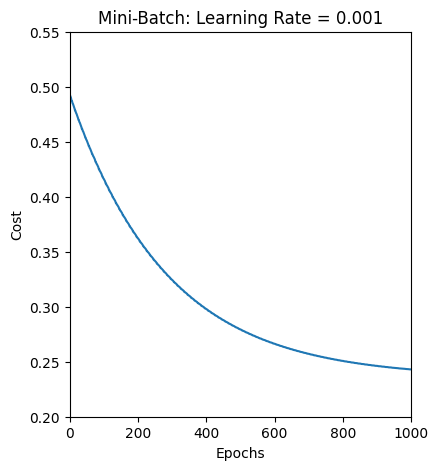

In [181]:
##################################
# Plotting the cost function profile
# for the mini-batch gradient descent process
# using a low learning rate value
##################################
fig = plt.figure(figsize=(4.4, 5))
plt.plot(range(len(costs_mini_batch)), costs_mini_batch)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim(0.20, 0.55)
plt.xlim(0,1000)
plt.title('Mini-Batch: Learning Rate = 0.001');

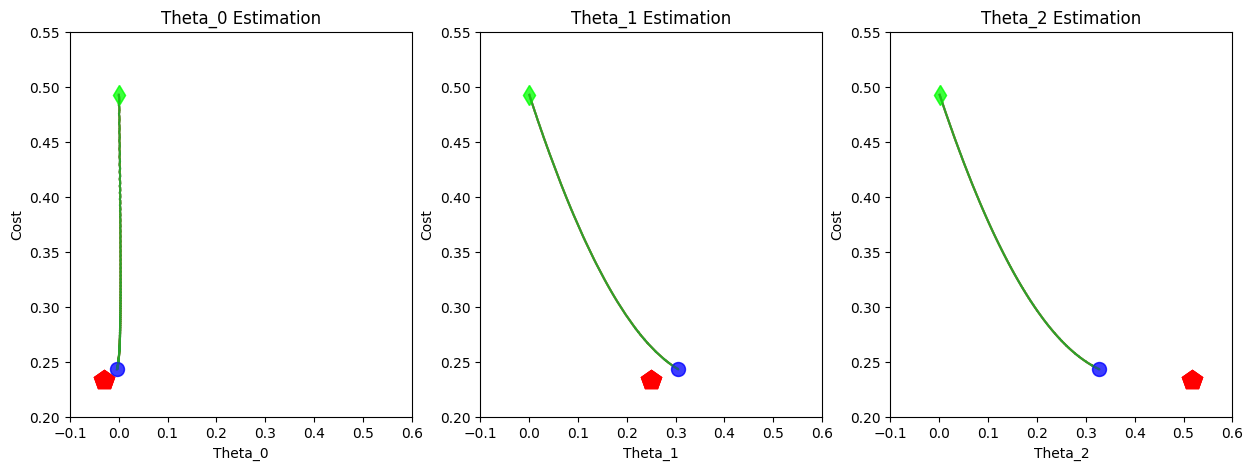

In [182]:
##################################
# Plotting the cost function profile
# for the mini_batch gradient descent process
# using a low learning rate value
# with respect to each individual coefficient estimate
##################################
plt.figure(figsize=(15, 5))
num_coeffs = x_train_matrix.shape[1]
for i in range(num_coeffs):
    plt.subplot(1, num_coeffs, i + 1)
    for j in range(num_coeffs):
        plt.plot(theta_path_mini_batch[:, i], costs_mini_batch, label='Theta {}'.format(i))
        plt.plot(theta_target[i], costs_minimum, marker='p', markersize=15, color='#FF0000')
        plt.plot(theta_path_mini_batch[0][i],costs_mini_batch[0], marker='d', markersize=10, color='#00FF0060')
        plt.plot(theta_path_mini_batch[-1][i],costs_mini_batch[-1], marker='o', markersize=10, color='#0000FF60')
    plt.ylim(0.20, 0.55)
    plt.xlim(-0.10,0.60)
    plt.xlabel('Theta_{}'.format(i))
    plt.ylabel('Cost')
    plt.title('Theta_{} Estimation'.format(i))


In [183]:
##################################
# Determining the final estimated loss
##################################
loss_vector_mbgd_llearningrate = costs_mini_batch[-1]
loss_vector_mbgd_llearningrate

np.float64(0.243043097470057)

In [184]:
##################################
# Consolidating the regression coefficients
# obtained using the mini-batch gradient descent process
# with low learning rate
##################################
linear_regression_mbgd_llearningrate_coefficients = pd.DataFrame(["INTERCEPT","LIFEXP","GDPCAP"])
linear_regression_mbgd_llearningrate = pd.DataFrame(theta_path_stochastic[-1])
linear_regression_mbgd_llearningrate_method = pd.DataFrame(["MiniBatchGradientDescent_LowLearningRate"]*3)
linear_regression_mbgd_llearningrate_summary = pd.concat([linear_regression_mbgd_llearningrate_coefficients, 
                                                         linear_regression_mbgd_llearningrate,
                                                         linear_regression_mbgd_llearningrate_method], axis=1)
linear_regression_mbgd_llearningrate_summary.columns = ['Coefficient', 'Estimate', 'Method']
linear_regression_mbgd_llearningrate_summary.reset_index(inplace=True, drop=True)
display(linear_regression_mbgd_llearningrate_summary)


,Coefficient,Estimate,Method
0,INTERCEPT,0.169979,MiniBatchGradientDescent_LowLearningRate
1,LIFEXP,0.004367,MiniBatchGradientDescent_LowLearningRate
2,GDPCAP,0.690416,MiniBatchGradientDescent_LowLearningRate


### 1.6.8 Mini-Batch Gradient Descent Algorithm with High Learning Rate <a class="anchor" id="1.6.8"></a>

[Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) minimizes the loss function parameterized by the model’s coefficients based on the direction and learning rate factors which determine the partial derivative calculations of future iterations, allowing the algorithm to gradually arrive at the local or global minimum considered the point of convergence. 

[Mini-Batch Gradient Descent](https://link.springer.com/book/10.1007/978-1-4757-3462-1) serves as a compromise between full batch gradient descent and stochastic gradient descent. Instead of processing the entire dataset or just one example at a time, mini-batch gradient descent divides the dataset into small batches of fixed size. The gradients are computed for each mini-batch, and the model parameters are updated based on the average gradient computed from the mini-batch. This approach combines the advantages of both full batch and stochastic gradient descent. It provides more stable updates compared to stochastic gradient descent while being computationally more efficient than full batch gradient descent. The batch size can be adjusted based on computational resources and desired convergence properties.

1. The mini-batch gradient descent algorithm was implemented with parameter settings described as follows:
    * <span style="color: #FF0000">Learning Rate</span> = 0.100 (High)
    * <span style="color: #FF0000">Batch</span> = 10
    * <span style="color: #FF0000">Iteration</span> = 100
    * <span style="color: #FF0000">Epochs</span> = 1000 (Gradient Computation Based on a Batch of 10 Cases)
2. The final cost estimate determined as 0.23426 at the 1000th epoch was not optimally low as compared to the minimum cost determined as 0.23361 using normal equations.
3. The cost function profile was slightly unstable during the epoch training process.
4. Applying the mini-batch gradient descent algorithm with a high learning rate, the estimated linear regression coefficients for the given data are as follows:
    * <span style="color: #FF0000">INTERCEPT</span> = -0.00300 (Baseline = -0.03090)
    * <span style="color: #FF0000">LIFEXP</span> = +0.10051 (Baseline = +0.24944)
    * <span style="color: #FF0000">GDPCAP</span> = +0.43251 (Baseline = +0.51737)
5. The estimated coefficients using the mini-batch gradient descent algorithm with a high learning rate were not fully optimized and comparable with the baseline coefficients using normal equations.


In [185]:
##################################
# Implementing the mini-batch gradient descent process
# for determining the regression coefficients
# using a low learning rate value
##################################
theta_mini_batch, costs_mini_batch, theta_path_mini_batch = mini_batch_gradient_descent(X=x_train_matrix, y=y_train, batch_size=10, learning_rate=0.100, num_iterations=100)

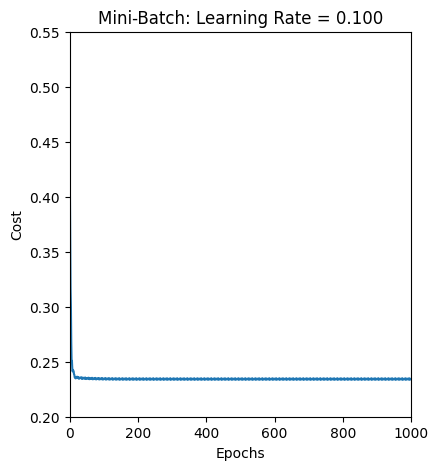

In [186]:
##################################
# Plotting the cost function profile
# for the mini-batch gradient descent process
# using a high learning rate value
##################################
fig = plt.figure(figsize=(4.4, 5))
plt.plot(range(len(costs_mini_batch)), costs_mini_batch)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim(0.20, 0.55)
plt.xlim(0,1000)
plt.title('Mini-Batch: Learning Rate = 0.100');

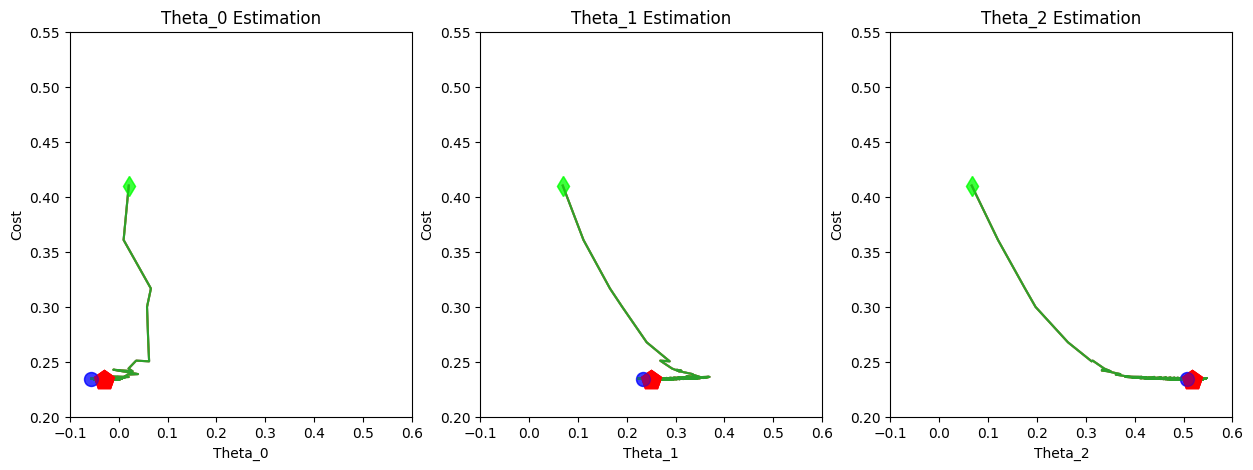

In [187]:
##################################
# Plotting the cost function profile
# for the mini_batch gradient descent process
# using a high learning rate value
# with respect to each individual coefficient estimate
##################################
plt.figure(figsize=(15, 5))
num_coeffs = x_train_matrix.shape[1]
for i in range(num_coeffs):
    plt.subplot(1, num_coeffs, i + 1)
    for j in range(num_coeffs):
        plt.plot(theta_path_mini_batch[:, i], costs_mini_batch, label='Theta {}'.format(i))
        plt.plot(theta_target[i], costs_minimum, marker='p', markersize=15, color='#FF0000')
        plt.plot(theta_path_mini_batch[0][i],costs_mini_batch[0], marker='d', markersize=10, color='#00FF0060')
        plt.plot(theta_path_mini_batch[-1][i],costs_mini_batch[-1], marker='o', markersize=10, color='#0000FF60')
    plt.ylim(0.20, 0.55)
    plt.xlim(-0.10,0.60)
    plt.xlabel('Theta_{}'.format(i))
    plt.ylabel('Cost')
    plt.title('Theta_{} Estimation'.format(i))

In [188]:
##################################
# Determining the final estimated loss
##################################
loss_vector_mbgd_hlearningrate = costs_mini_batch[-1]
loss_vector_mbgd_hlearningrate

np.float64(0.2342597006643096)

In [189]:
##################################
# Consolidating the regression coefficients
# obtained using the mini-batch gradient descent process
# with high learning rate
##################################
linear_regression_mbgd_hlearningrate_coefficients = pd.DataFrame(["INTERCEPT","LIFEXP","GDPCAP"])
linear_regression_mbgd_hlearningrate = pd.DataFrame(theta_path_stochastic[-1])
linear_regression_mbgd_hlearningrate_method = pd.DataFrame(["MiniBatchGradientDescent_HighLearningRate"]*3)
linear_regression_mbgd_hlearningrate_summary = pd.concat([linear_regression_mbgd_hlearningrate_coefficients, 
                                                         linear_regression_mbgd_hlearningrate,
                                                         linear_regression_mbgd_hlearningrate_method], axis=1)
linear_regression_mbgd_hlearningrate_summary.columns = ['Coefficient', 'Estimate', 'Method']
linear_regression_mbgd_hlearningrate_summary.reset_index(inplace=True, drop=True)
display(linear_regression_mbgd_hlearningrate_summary)


,Coefficient,Estimate,Method
0,INTERCEPT,0.169979,MiniBatchGradientDescent_HighLearningRate
1,LIFEXP,0.004367,MiniBatchGradientDescent_HighLearningRate
2,GDPCAP,0.690416,MiniBatchGradientDescent_HighLearningRate


## 1.7. Consolidated Findings <a class="anchor" id="1.7"></a>

1. The gradient descent approach and parameter setting which estimated sufficiently comparable coefficients with the baseline values is as follows:
    * <span style="color: #FF0000">BGD_HLR</span> = Batch Gradient Descent and High Learning Rate (0.100)
2. The choice of **Approach**, **Learning Rate** and **Epoch Count** in the implementation of the gradient descent algorithm are critical to achieving fully optimized coefficients while maintaining minimal cost estimates.


In [190]:
##################################
# Consolidating the regression coefficients
# obtained using all estimation methods
##################################
linear_regression_methods = pd.concat([linear_regression_scikitlearn_computations, 
                                       linear_regression_bgd_llearningrate_summary,
                                       linear_regression_bgd_hlearningrate_summary,
                                       linear_regression_sgd_llearningrate_summary,
                                       linear_regression_sgd_hlearningrate_summary,
                                       linear_regression_mbgd_llearningrate_summary,
                                       linear_regression_mbgd_hlearningrate_summary], axis=0)
linear_regression_methods.reset_index(inplace=True, drop=True)
display(linear_regression_methods)

,Coefficient,Estimate,Method
0,INTERCEPT,-0.030898,Normal_Equations
1,LIFEXP,0.249436,Normal_Equations
2,GDPCAP,0.517370,Normal_Equations
3,INTERCEPT,-0.003588,BatchGradientDescent_LowLearningRate
4,LIFEXP,0.305487,BatchGradientDescent_LowLearningRate
5,GDPCAP,0.327332,BatchGradientDescent_LowLearningRate
6,INTERCEPT,-0.030898,BatchGradientDescent_HighLearningRate
7,LIFEXP,0.249438,BatchGradientDescent_HighLearningRate
8,GDPCAP,0.517368,BatchGradientDescent_HighLearningRate
9,INTERCEPT,0.005041,StochasticGradientDescent_LowLearningRate


In [191]:
consolidated_ne = linear_regression_methods[linear_regression_methods['Method']=='Normal_Equations'].loc[:,"Estimate"]
consolidated_bgd_llr = linear_regression_methods[linear_regression_methods['Method']=='BatchGradientDescent_LowLearningRate'].loc[:,"Estimate"]
consolidated_bgd_hlr = linear_regression_methods[linear_regression_methods['Method']=='BatchGradientDescent_HighLearningRate'].loc[:,"Estimate"]
consolidated_sgd_llr = linear_regression_methods[linear_regression_methods['Method']=='StochasticGradientDescent_LowLearningRate'].loc[:,"Estimate"]
consolidated_sgd_hlr = linear_regression_methods[linear_regression_methods['Method']=='StochasticGradientDescent_HighLearningRate'].loc[:,"Estimate"]
consolidated_mbgd_llr = linear_regression_methods[linear_regression_methods['Method']=='MiniBatchGradientDescent_LowLearningRate'].loc[:,"Estimate"]
consolidated_mbgd_hlr = linear_regression_methods[linear_regression_methods['Method']=='MiniBatchGradientDescent_HighLearningRate'].loc[:,"Estimate"]
linear_regression_methods_plot = pd.DataFrame({'NE': consolidated_ne.values,
                                               'BGD_LLR': consolidated_bgd_llr.values,
                                               'BGD_HLR': consolidated_bgd_hlr.values,
                                               'SGD_LLR': consolidated_sgd_llr.values,
                                               'SGD_HLR': consolidated_sgd_hlr.values,
                                               'MBGD_LLR': consolidated_mbgd_llr.values,
                                               'MBGD_HLR': consolidated_mbgd_hlr.values},
                                              linear_regression_methods['Coefficient'].unique())
linear_regression_methods_plot

,NE,BGD_LLR,BGD_HLR,SGD_LLR,SGD_HLR,MBGD_LLR,MBGD_HLR
INTERCEPT,-0.030898,-0.003588,-0.030898,0.005041,0.169979,0.169979,0.169979
LIFEXP,0.249436,0.305487,0.249438,0.305187,0.004367,0.004367,0.004367
GDPCAP,0.517370,0.327332,0.517368,0.345268,0.690416,0.690416,0.690416


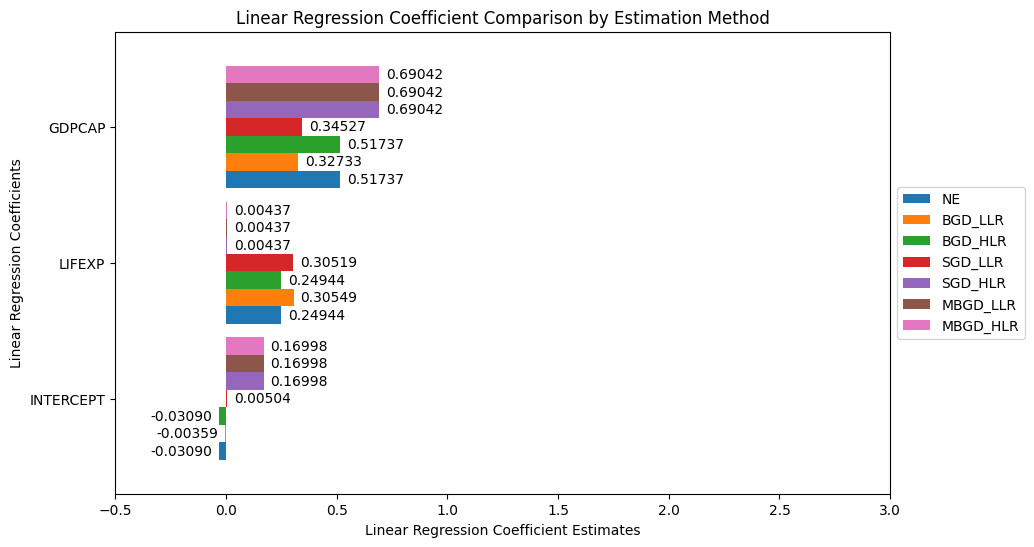

In [192]:
linear_regression_coefficent_estimation_methods_plot = linear_regression_methods_plot.plot.barh(figsize=(10, 6),width=0.90)
linear_regression_coefficent_estimation_methods_plot.set_xlim(-0.5,3)
linear_regression_coefficent_estimation_methods_plot.set_title("Linear Regression Coefficient Comparison by Estimation Method")
linear_regression_coefficent_estimation_methods_plot.set_xlabel("Linear Regression Coefficient Estimates")
linear_regression_coefficent_estimation_methods_plot.set_ylabel("Linear Regression Coefficients")
linear_regression_coefficent_estimation_methods_plot.grid(False)
linear_regression_coefficent_estimation_methods_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in linear_regression_coefficent_estimation_methods_plot.containers:
    linear_regression_coefficent_estimation_methods_plot.bar_label(container, fmt='%.5f', padding=5, color='black')

# 2. Summary <a class="anchor" id="Summary"></a>


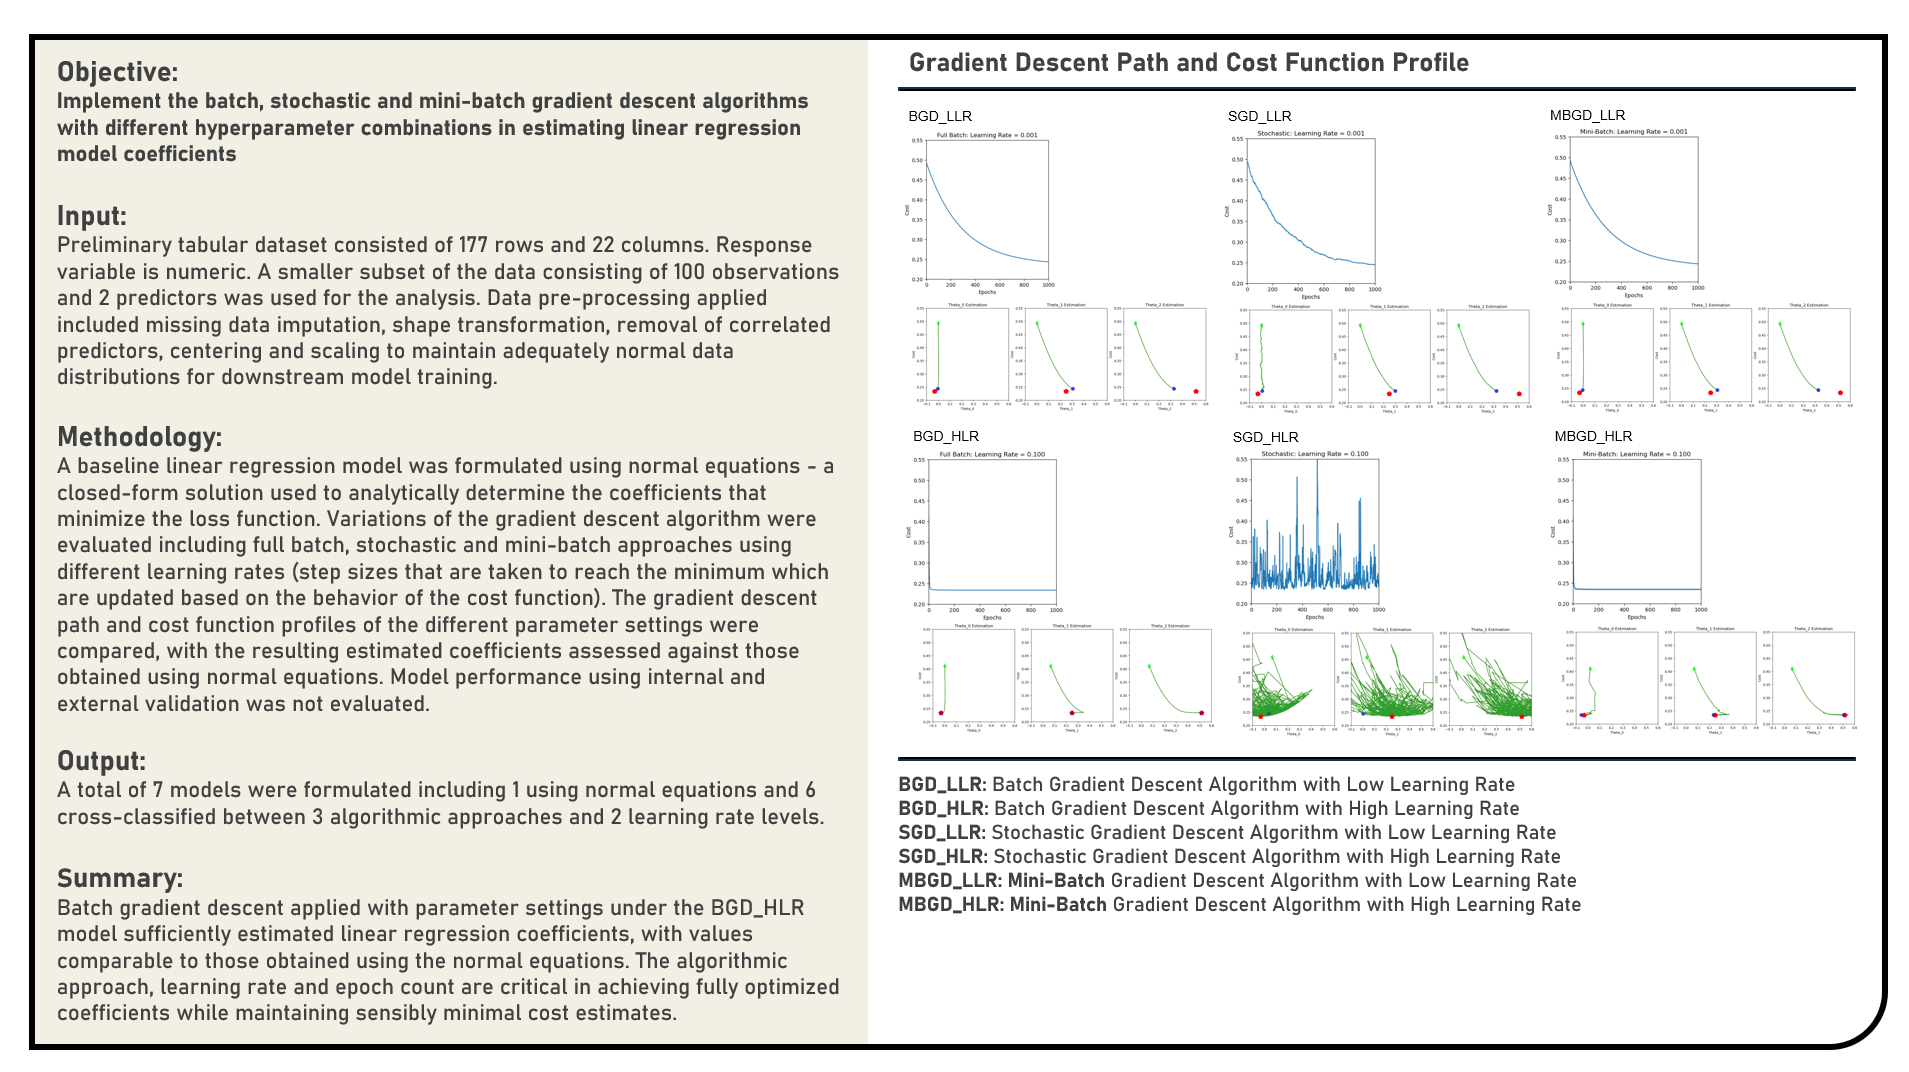

# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Deep Learning: A Visual Approach](https://nostarch.com/deep-learning-visual-approach) by Andrew Glassner
* **[Book]** [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python-second-edition) by François Chollet
* **[Book]** [Data Preparation for Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python](https://machinelearningmastery.com/data-preparation-for-machine-learning/) by Jason Brownlee (Machine Learning Mastery)
* **[Book]** [Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson
* **[Book]** [Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/) by Alice Zheng and Amanda Casari
* **[Book]** [Applied Predictive Modeling](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) by Max Kuhn and Kjell Johnson
* **[Book]** [Data Mining: Practical Machine Learning Tools and Techniques](https://www.sciencedirect.com/book/9780123748560/data-mining-practical-machine-learning-tools-and-techniques?via=ihub=) by Ian Witten, Eibe Frank, Mark Hall and Christopher Pal 
* **[Book]** [Data Cleaning](https://dl.acm.org/doi/book/10.1145/3310205) by Ihab Ilyas and Xu Chu
* **[Book]** [Data Wrangling with Python](https://www.oreilly.com/library/view/data-wrangling-with/9781491948804/) by Jacqueline Kazil and Katharine Jarmul
* **[Book]** [Regression Modeling Strategies](https://link.springer.com/book/10.1007/978-1-4757-3462-1) by Frank Harrell
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.pipeline](https://scikit-learn.org/stable/modules/compose.html) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Article]** [Exploratory Data Analysis in Python — A Step-by-Step Process](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee) by Andrea D'Agostino (Towards Data Science)
* **[Article]** [Exploratory Data Analysis with Python](https://medium.com/@douglas.rochedo/exploratory-data-analysis-with-python-78b6c1d479cc) by Douglas Rocha (Medium)
* **[Article]** [4 Ways to Automate Exploratory Data Analysis (EDA) in Python](https://builtin.com/data-science/EDA-python) by Abdishakur Hassan (BuiltIn)
* **[Article]** [10 Things To Do When Conducting Your Exploratory Data Analysis (EDA)](https://www.analyticsvidhya.com) by Alifia Harmadi (Medium)
* **[Article]** [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Statistical Imputation for Missing Values in Machine Learning](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Imputing Missing Data with Simple and Advanced Techniques](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87) by Idil Ismiguzel (Towards Data Science)
* **[Article]** [Missing Data Imputation Approaches | How to handle missing values in Python](https://www.machinelearningplus.com/machine-learning/missing-data-imputation-how-to-handle-missing-values-in-python/) by Selva Prabhakaran (Machine Learning +)
* **[Article]** [Master The Skills Of Missing Data Imputation Techniques In Python(2022) And Be Successful](https://medium.com/analytics-vidhya/a-quick-guide-on-missing-data-imputation-techniques-in-python-2020-5410f3df1c1e) by Mrinal Walia (Analytics Vidhya)
* **[Article]** [How to Preprocess Data in Python](https://builtin.com/machine-learning/how-to-preprocess-data-python) by Afroz Chakure (BuiltIn)
* **[Article]** [Easy Guide To Data Preprocessing In Python](https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html) by Ahmad Anis (KDNuggets)
* **[Article]** [Data Preprocessing in Python](https://towardsdatascience.com/data-preprocessing-in-python-b52b652e37d5) by Tarun Gupta (Towards Data Science)
* **[Article]** [Data Preprocessing using Python](https://medium.com/@suneet.bhopal/data-preprocessing-using-python-1bfee9268fb3) by Suneet Jain (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.com/@abonia/data-preprocessing-in-python-1f90d95d44f4) by Abonia Sojasingarayar (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.datadriveninvestor.com/data-preprocessing-3cd01eefd438) by Afroz Chakure (Medium)
* **[Article]** [Detecting and Treating Outliers | Treating the Odd One Out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/) by Harika Bonthu (Analytics Vidhya)
* **[Article]** [Outlier Treatment with Python](https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02) by Sangita Yemulwar (Analytics Vidhya)
* **[Article]** [A Guide to Outlier Detection in Python](https://builtin.com/data-science/outlier-detection-python) by Sadrach Pierre (BuiltIn)
* **[Article]** [How To Find Outliers in Data Using Python (and How To Handle Them)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/) by Eric Kleppen (Career Foundry)
* **[Article]** [Statistics in Python — Collinearity and Multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f) by Wei-Meng Lee (Towards Data Science)
* **[Article]** [Understanding Multicollinearity and How to Detect it in Python](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc) by Terence Shin (Towards Data Science)
* **[Article]** [A Python Library to Remove Collinearity](https://www.yourdatateacher.com/2021/06/28/a-python-library-to-remove-collinearity/) by Gianluca Malato (Your Data Teacher)
* **[Article]** [8 Best Data Transformation in Pandas](https://ai.plainenglish.io/data-transformation-in-pandas-29b2b3c61b34) by Tirendaz AI (Medium)
* **[Article]** [Data Transformation Techniques with Python: Elevate Your Data Game!](https://medium.com/@siddharthverma.er.cse/data-transformation-techniques-with-python-elevate-your-data-game-21fcc7442cc2) by Siddharth Verma (Medium)
* **[Article]** [Data Scaling with Python](https://www.kdnuggets.com/2023/07/data-scaling-python.html) by Benjamin Obi Tayo (KDNuggets)
* **[Article]** [How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Feature Engineering: Scaling, Normalization, and Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) by Aniruddha Bhandari  (Analytics Vidhya)
* **[Article]** [How to Normalize Data Using scikit-learn in Python](https://www.digitalocean.com/community/tutorials/normalize-data-in-python) by Jayant Verma (Digital Ocean)
* **[Article]** [What are Categorical Data Encoding Methods | Binary Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/) by Shipra Saxena  (Analytics Vidhya)
* **[Article]** [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html) by Chris Moffitt (Practical Business Python)
* **[Article]** [Categorical Data Encoding Techniques in Python: A Complete Guide](https://soumenatta.medium.com/categorical-data-encoding-techniques-in-python-a-complete-guide-a913aae19a22) by Soumen Atta (Medium)
* **[Article]** [Categorical Feature Encoding Techniques](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24) by Tara Boyle (Medium)
* **[Article]** [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Hypothesis Testing with Python: Step by Step Hands-On Tutorial with Practical Examples](https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e) by Ece Işık Polat (Towards Data Science)
* **[Article]** [17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [A Step-by-Step Guide to Hypothesis Testing in Python using Scipy](https://medium.com/@gabriel_renno/a-step-by-step-guide-to-hypothesis-testing-in-python-using-scipy-8eb5b696ab07) by Gabriel Rennó (Medium)
* **[Article]** [Gradient Descent and Stochastic Gradient Descent in R](https://www.ocf.berkeley.edu/~janastas/stochastic-gradient-descent-in-r.html) by Jason Anastasopoulos
* **[Article]** [Linear Regression Tutorial Using Gradient Descent for Machine Learning](https://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [An Overview of Gradient Descent Optimization Algorithms](https://ruder.io/optimizing-gradient-descent/) by Sebastian Ruder
* **[Article]** [What is Gradient Descent?](https://www.ibm.com/topics/gradient-descent) by IBM Team
* **[Article]** [Gradient Descent in Machine Learning: A Basic Introduction](https://builtin.com/data-science/gradient-descent) by Niklas Donges
* **[Article]** [Gradient Descent for Linear Regression Explained, Step by Step](https://machinelearningcompass.com/machine_learning_math/gradient_descent_for_linear_regression/) by Boris Giba
* **[Article]** [Gradient Descent Explained Simply with Examples](https://vitalflux.com/gradient-descent-explained-simply-with-examples/) by Ajitesh Kumar
* **[Article]** [Implementing the Gradient Descent Algorithm in R](https://www.r-bloggers.com/2017/02/implementing-the-gradient-descent-algorithm-in-r/) by Richter Walsh
* **[Article]** [Regression via Gradient Descent in R](https://www.r-bloggers.com/2011/11/regression-via-gradient-descent-in-r/) by Matt Bogard
* **[Article]** [Stochastic Gradient Descent](http://optimization.cbe.cornell.edu/index.php?title=Stochastic_gradient_descent) by Jonathon Price, Alfred Wong, Tiancheng Yuan, Joshua Mathew and Taiwo Olorunniwo
* **[Article]** [Difference Between Batch Gradient Descent and Stochastic Gradient Descent](https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/) by Geeks For Geeks Team
* **[Article]** [Stochastic Gradient Descent Vs Gradient Descent: A Head-To-Head Comparison](https://sdsclub.com/stochastic-gradient-descent-vs-gradient-descent-a-head-to-head-comparison/) by SDS Club Team
* **[Article]** [Differences Between Gradient, Stochastic and Mini Batch Gradient Descent](https://www.baeldung.com/cs/gradient-stochastic-and-mini-batch) by Baeldung
* **[Article]** [Difference Between Backpropagation and Stochastic Gradient Descent](https://machinelearningmastery.com/difference-between-backpropagation-and-stochastic-gradient-descent/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [ML | Normal Equation in Linear Regression](https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/) by Geeks For Geeks Team
* **[Article]** [Derivation of the Normal Equation for Linear Regression](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/) by Eli Bendersky
* **[Article]** [Normal Equation](http://mlwiki.org/index.php/Normal_Equation) by ML Wiki Team
* **[Article]** [Normal Equations](https://www.statlect.com/glossary/normal-equations#:~:text=In%20linear%20regression%20analysis%2C%20the%20normal%20equations%20are,first-order%20condition%20of%20the%20Least%20Squares%20minimization%20problem.) by Marco Taboga
* **[Article]** [Fitting a Model via Closed-form Equations versus Gradient Descent Versus Stochastic Gradient Descent Versus Mini-Batch Learning. What is the Difference?](https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html) by Sebastian Raschka
* **[Article]** [Gradient Descent Versus Normal Equation For Regression Problems](https://pushkarasharma.github.io/2020/06/27/Gradient_vs_Normal.html) by Pushkara Sharma
* **[Article]** [Batch, Mini Batch & Stochastic Gradient Descent](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a#:~:text=Batch%20Gradient%20Descent%20can%20be,converges%20faster%20for%20larger%20datasets.) by Sushant Patrikar (Towards Data Science)
* **[Article]** [Difference between Batch Gradient Descent and Stochastic Gradient Descent](https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/) by Geeks for Geeks Team
* **[Article]** [Variants of Gradient Descent Algorithm](https://www.analyticsvidhya.com/blog/2021/03/variants-of-gradient-descent-algorithm/) by Himanshi Singh (Analytics Vidhya)
* **[Article]** [Difference Between SGD, GD, and Mini-batch GD](https://www.tutorialspoint.com/difference-between-sgd-gd-and-mini-batch-gd) by Jay Singh (TutorialsPoint)
* **[Article]** [Batch , Mini Batch and Stochastic Gradient Descent](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) by Sweta (Medium)
* **[Article]** [A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Batch vs Mini-batch vs Stochastic Gradient Descent with Code Examples](https://medium.datadriveninvestor.com/batch-vs-mini-batch-vs-stochastic-gradient-descent-with-code-examples-cd8232174e14) by Matheus Jacques (Medium)
* **[Article]** [Batch vs Stochastic vs Mini Batch Gradient Descent Techniques](https://medium.com/@amannagrawall002/batch-vs-stochastic-vs-mini-batch-gradient-descent-techniques-7dfe6f963a6f) by Aman Agrawal (Medium)
* **[Article]** [Difference Between a Batch and an Epoch in a Neural Network](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Batch, Mini-Batch and Stochastic Gradient Descent for Linear Regression](https://towardsdatascience.com/batch-mini-batch-and-stochastic-gradient-descent-for-linear-regression-9fe4eefa637c) by Robert Kwiatkowski (Towards Data Science)
* **[Publication]** [New Methods for the Determination of Comet Orbits](https://www.semanticscholar.org/paper/Nouvelles-m%C3%A9thodes-pour-la-d%C3%A9termination-des-des-Legendre/21c9090e226ab449ffb608ddb2cb925911a61f24) by Adrien-Marie Legendre
* **[Publication]** [General Method for the Resolution of a System of Simultaneous Equations](https://cs.uwaterloo.ca/~y328yu/classics/cauchy-en.pdf) by Augustine Cauchy
* **[Publication]** [Data Quality for Machine Learning Tasks](https://journals.sagepub.com/doi/10.1177/0962280206074463) by Nitin Gupta, Shashank Mujumdar, Hima Patel, Satoshi Masuda, Naveen Panwar, Sambaran Bandyopadhyay, Sameep Mehta, Shanmukha Guttula, Shazia Afzal, Ruhi Sharma Mittal and Vitobha Munigala (KDD ’21: Proceedings of the 27th ACM SIGKDD Conference on Knowledge Discovery & Data Mining)
* **[Publication]** [Overview and Importance of Data Quality for Machine Learning Tasks](https://dl.acm.org/doi/10.1145/3394486.3406477) by Abhinav Jain, Hima Patel, Lokesh Nagalapatti, Nitin Gupta, Sameep Mehta, Shanmukha Guttula, Shashank Mujumdar, Shazia Afzal, Ruhi Sharma Mittal and Vitobha Munigala (KDD ’20: Proceedings of the 26th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining)
* **[Publication]** [Multiple Imputation of Discrete and Continuous Data by Fully Conditional Specification](https://journals.sagepub.com/doi/10.1177/0962280206074463) by Stef van Buuren (Statistical Methods in Medical Research)
* **[Publication]** [Mathematical Contributions to the Theory of Evolution: Regression, Heredity and Panmixia](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) by Karl Pearson (Royal Society)
* **[Publication]** [A New Family of Power Transformations to Improve Normality or Symmetry](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) by In-Kwon Yeo and Richard Johnson (Biometrika)
* **[Course]** [IBM Data Analyst Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-analyst) by IBM Team (Coursera)
* **[Course]** [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science) by IBM Team (Coursera)
* **[Course]** [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) by IBM Team (Coursera)
* **[Course]** [Machine Learning Specialization Certificate](https://www.coursera.org/specializations/machine-learning-introduction) by DeepLearning.AI Team (Coursera)

***

In [193]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))